# Predicting Median Price Per Square Foot during COVID
### Author: Alex Heinz
## Objective
There is heightened talk regarding Real Estate and the effects that COVID is taking on the market. New homeowners are facing obstacles getting a mortgage. Not only because house prices are at an all time high this year, but also because of the COVID pandemic. Lenders are making sure borrowers can still make their payments with all of the new unemployment spike and I’m wondering what and how it is affecting the housing market now, and long term. Mortgage rates are historically low, and buyers are battling low inventory and higher prices. I’m wanting to dive deeper into that to solve many questions, such as ‘ Buyer’s - Will there be a housing crash?’ and the Seller’s questions of ‘Are people still wanting to buy my home?’ 

In this final project, I am building supervised, unsupervised and deep learning models to:

<ul>
<li>To solve a business problem and predict Median Ppsf</li>
<li>Evaluate how well the models can predict Median Ppsf based on past trends and new COVID data.</li>
</ul>

## Hypothesis
<ul>
    <li>Ho: There is no significant relationship between Median Price per Square Feet and COVID total cases data; in other words, the Median Price Per Square Feet values that are being predicted are no closer to the actual Median Price per Square Feet values than you would expect by chance. </li>
    <li>Ha: There is a significant relationship between Median Price per Square Feet and COVID total cases data.</li>
</ul>


## Data

For the Housing Data, I pulled public housing data from [Redfin Housing Data Center](https://www.redfin.com/blog/data-center/). For the COVID disease Data, I pulled public COVID data from Our World In Data on Github [COVID-19 Data](https://github.com/owid/covid-19-data/tree/master/public/data) The datasets contain a total of roughly 42,000 observations and 100 variables.  The datasets provide detailed information about COVID cases, housing history, summary data and property types including:

<ul>
    <li>Single Family homes</li>
    <li>Condos</li>
    <li>Townhomes</li>
    <li>Multi-Family</li>
    <li>Summary of all home data</li>
</ul>

#### Import libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#KMeans
from sklearn.cluster import KMeans
#StandardScaler
from sklearn.preprocessing import StandardScaler
#PCA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
#TSNE
from sklearn.manifold import TSNE
# warnings
import warnings
warnings.filterwarnings('ignore')
#Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
#AggCluster
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, metrics

## Import and load COVID csv file 

In [2]:
covid = pd.read_csv(r'/Users/alexanderheinz/Downloads/owid-covid-data.csv')

In [3]:
#Lets get an idea of the covid data
covid.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2019-12-31          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-01          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-02          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-03          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-04          0.0        0.0   

   total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
0           0.0         0.0                      0.0                    0.0   
1           0.0         0.0                      0.0                    0.0   
2           0.0         0.0                      0.0                    0.0   
3           0.0         0.0                      0.0                    0.0   
4           0.0         0.0                      0.0                    0.0   

   ...  aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0  ...          1.337        1803.987              NaN                597.029   
1  ...          1.337        1803.987              NaN                597.029   
2  ...          1.337        1803.987              NaN                597.029   
3  ...          1.337        1803.987              NaN                597.029   
4  ...          1.337        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  
0                         0.5            64.83  
1                         0.5            64.83  
2                         0.5            64.83  
3                         0.5            64.83  
4                         0.5            64.83  

[5 rows x 36 columns]

In [4]:
# Get an overview of the data
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35507 entries, 0 to 35506
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         35443 non-null  object 
 1   continent                        35221 non-null  object 
 2   location                         35507 non-null  object 
 3   date                             35507 non-null  object 
 4   total_cases                      35162 non-null  float64
 5   new_cases                        35162 non-null  float64
 6   total_deaths                     35162 non-null  float64
 7   new_deaths                       35162 non-null  float64
 8   total_cases_per_million          35098 non-null  float64
 9   new_cases_per_million            35098 non-null  float64
 10  total_deaths_per_million         35098 non-null  float64
 11  new_deaths_per_million           35098 non-null  float64
 12  new_tests         

In [5]:
#What features have null rows?
covid.isnull().sum()

iso_code                              64
continent                            286
location                               0
date                                   0
total_cases                          345
new_cases                            345
total_deaths                         345
new_deaths                           345
total_cases_per_million              409
new_cases_per_million                409
total_deaths_per_million             409
new_deaths_per_million               409
new_tests                          24418
total_tests                        24071
total_tests_per_thousand           24071
new_tests_per_thousand             24418
new_tests_smoothed                 23039
new_tests_smoothed_per_thousand    23039
tests_per_case                     23881
positive_rate                      23537
tests_units                        22293
stringency_index                    6650
population                            64
population_density                  1617
median_age      

## Import and load Redfin csv files

In [6]:
#Load and read the different types of housing csv files
condos = pd.read_csv(r'/Users/alexanderheinz/Downloads/condo.csv')
single_family = pd.read_csv(r'/Users/alexanderheinz/Downloads/single_family.csv')
townhouse = pd.read_csv(r'/Users/alexanderheinz/Downloads/townhouse.csv')
multi_family = pd.read_csv(r'/Users/alexanderheinz/Downloads/multi_family.csv')
all_homes = pd.read_csv(r'/Users/alexanderheinz/Downloads/all_region.csv')

#### Merge all housing types with pd.concat.


In [7]:
#Merge
frames = [condos, single_family, townhouse, multi_family, all_homes]
merged = pd.concat(frames)

In [8]:
#Let's look at unique Major Markets
merged.parent_metro_region.unique()

array(['Phoenix, AZ', 'Los Angeles, CA', 'Miami, FL', 'Atlanta, GA',
       'Chicago, IL', 'Boston, MA', 'Charlotte, NC', 'New York, NY',
       'Houston, TX'], dtype=object)

In [9]:
merged = merged.sort_values(by=['Period End'], ascending = True)

In [10]:
#Lets get an idea of the merged data
merged.head()

Region Month of Period End              Property Type  \
645      Maricopa County, AZ        January 2013                  Townhouse   
77      Middlesex County, MA        January 2013            All Residential   
309   Los Angeles County, CA        January 2013                  Townhouse   
1189  Chicago, IL metro area        January 2013            All Residential   
18           Cook County, IL        January 2013  Single Family Residential   

     Region Type  Seasonally Adjusted State Code City          last_updated  \
645       County                False         AZ  NaN  7/12/2020 2:55:53 PM   
77        County                False         MA  NaN  7/12/2020 2:55:53 PM   
309       County                False         CA  NaN  7/12/2020 2:55:53 PM   
1189       Metro                False         IL  NaN  7/12/2020 2:55:53 PM   
18        County                False         IL  NaN  7/12/2020 2:55:53 PM   

      Measure Display parent_metro_region  ... pending_sales_yoy  \
645               NaN         Phoenix, AZ  ...          0.095122   
77                NaN          Boston, MA  ...          0.387097   
309               NaN     Los Angeles, CA  ...          0.419355   
1189              NaN         Chicago, IL  ...          0.438591   
18                NaN         Chicago, IL  ...          0.448485   

     Period Duration Price Drops  Price Drops Mom Price Drops Yoy  \
645               30    0.227273         0.047342       -0.015451   
77                30    0.129985         0.041835       -0.036712   
309               30    0.188272        -0.148871       -0.088837   
1189              30    0.231751         0.070849       -0.027692   
18                30    0.238052         0.074300       -0.018060   

      property_type_id  region_type_id  Sold Above List  Sold Above List Mom  \
645                 13               5         0.216401            -0.016008   
77                  -1               5         0.186329            -0.038460   
309                 13               5         0.365759             0.041508   
1189                -1              -2         0.205947             0.011429   
18                   6               5         0.213295             0.011275   

     Sold Above List Yoy  
645             0.020322  
77              0.070700  
309             0.137960  
1189            0.048157  
18              0.048347  

[5 rows x 65 columns]

In [11]:
# Get an overview of the data
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6103 entries, 645 to 684
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Region                          6103 non-null   object 
 1   Month of Period End             6103 non-null   object 
 2   Property Type                   6103 non-null   object 
 3   Region Type                     6103 non-null   object 
 4   Seasonally Adjusted             6103 non-null   bool   
 5   State Code                      6103 non-null   object 
 6   City                            310 non-null    object 
 7   last_updated                    6103 non-null   object 
 8   Measure Display                 0 non-null      float64
 9   parent_metro_region             6103 non-null   object 
 10  Period Begin                    6103 non-null   object 
 11  Period End                      6103 non-null   object 
 12  State                           4

In [12]:
# Drop features that aren't important
merged = merged.drop(['Region', 'parent_metro_region_metro_code', 'property_type_id', 'region_type_id', 'Region Type', 'Seasonally Adjusted', 'last_updated', 'Worksheet Filter', 'Measure Display', 'Number of Records', 'Period Begin', 'Period Duration', 'State', 'City', 'State Code', 'Table Id'], axis=1)

In [13]:
#What features have null rows?
merged.isnull().sum()

Month of Period End              0
Property Type                    0
parent_metro_region              0
Period End                       0
active_listings                  0
active_listings_mom             24
active_listings_yoy            186
Avg Sale To List                 0
Avg Sale To List Mom            24
Avg Sale To List Yoy           186
Homes Sold                       0
Homes Sold Mom                  24
Homes Sold Yoy                 186
Inventory                      140
Inventory Mom                  169
Inventory Yoy                  386
Median Dom                      90
Median Dom Mom                 122
Median Dom Yoy                 339
Median List Ppsf                 0
Median List Ppsf Mom            24
Median List Ppsf Yoy           186
Median List Price                0
Median List Price Mom           24
Median List Price Yoy          186
Median Ppsf                      4
Median Ppsf Mom                 32
Median Ppsf Yoy                194
Median Sale Price   

In [14]:
#use method ffill to occupy the missing rows.
merged = merged.fillna(method='ffill')

I looked at backfill and simple imputer to complete missing values, but since backfill would be filling in past values from the future, forwardfill did a better job representing the data as a whole.

In [15]:
# Look at data types of each column
merged.dtypes

Month of Period End             object
Property Type                   object
parent_metro_region             object
Period End                      object
active_listings                  int64
active_listings_mom            float64
active_listings_yoy            float64
Avg Sale To List               float64
Avg Sale To List Mom            object
Avg Sale To List Yoy            object
Homes Sold                       int64
Homes Sold Mom                  object
Homes Sold Yoy                  object
Inventory                      float64
Inventory Mom                   object
Inventory Yoy                   object
Median Dom                     float64
Median Dom Mom                 float64
Median Dom Yoy                 float64
Median List Ppsf               float64
Median List Ppsf Mom           float64
Median List Ppsf Yoy           float64
Median List Price              float64
Median List Price Mom          float64
Median List Price Yoy          float64
Median Ppsf              

## Numeric Data

In [16]:
#gather numerical dtypes to look at summary of features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

quant_vars = merged.select_dtypes(include=numerics)

In [17]:
#display summary
quant_vars.describe()

active_listings  active_listings_mom  active_listings_yoy  \
count      6103.000000          6103.000000          6103.000000   
mean       7874.257087             0.001026            -0.027573   
std        9276.192944             0.081126             0.252753   
min          18.000000            -0.334501            -0.614997   
25%        1266.500000            -0.040882            -0.135431   
50%        3324.000000             0.000000            -0.036902   
75%       12140.500000             0.041143             0.055255   
max       50662.000000             0.523810             5.142857   

       Avg Sale To List    Homes Sold     Inventory   Median Dom  \
count       6103.000000   6103.000000   6103.000000  6103.000000   
mean           0.977240   1617.177945   5843.471571    54.952319   
std            0.020909   2026.925687   7030.597692    33.587627   
min            0.719199      1.000000     12.000000     1.000000   
25%            0.967424    280.000000    900.500000    35.000000   
50%            0.976928    656.000000   2322.000000    48.000000   
75%            0.990752   2176.000000   9164.000000    68.000000   
max            1.158552  12069.000000  40885.000000   479.000000   

       Median Dom Mom  Median Dom Yoy  Median List Ppsf  ...  \
count     6103.000000     6103.000000       6103.000000  ...   
mean        -0.492872       -4.992790        222.574655  ...   
std         20.566587       24.986662        120.259183  ...   
min       -416.000000     -396.000000         47.000000  ...   
25%         -4.000000      -13.000000        129.477955  ...   
50%          1.000000       -2.000000        179.156390  ...   
75%          5.000000        5.000000        281.978799  ...   
max        361.000000      401.000000        745.897651  ...   

       off_market_in_two_weeks_yoy  pending_sales  pending_sales_mom  \
count                  6103.000000    6103.000000        6103.000000   
mean                      0.011782    1393.347862           0.039778   
std                       0.117424    1796.929264           0.324817   
min                      -0.666667       1.000000          -0.869565   
25%                      -0.039784     239.000000          -0.115635   
50%                       0.000935     510.000000          -0.000560   
75%                       0.047106    1786.500000           0.140616   
max                       1.000000   10329.000000          10.000000   

       pending_sales_yoy  Price Drops  Price Drops Mom  Price Drops Yoy  \
count        6103.000000  6103.000000      6103.000000      6103.000000   
mean            0.110310     0.205477         0.000172        -0.000756   
std             0.655541     0.079701         0.053589         0.063384   
min            -0.900000     0.000057        -0.547441        -0.507861   
25%            -0.062385     0.153918        -0.021303        -0.027526   
50%             0.030387     0.196231         0.002598        -0.001600   
75%             0.159108     0.250622         0.023143         0.025113   
max            16.636364     0.935052         0.530250         0.594473   

       Sold Above List  Sold Above List Mom  Sold Above List Yoy  
count      6103.000000          6103.000000          6103.000000  
mean          0.235277             0.000849             0.007683  
std           0.123870             0.063375             0.083682  
min           0.000000            -1.000000            -1.000000  
25%           0.148009            -0.018182            -0.029293  
50%           0.211072            -0.000520             0.004758  
75%           0.319673             0.018023             0.043904  
max           1.000000             1.000000             1.000000  

[8 rows x 34 columns]

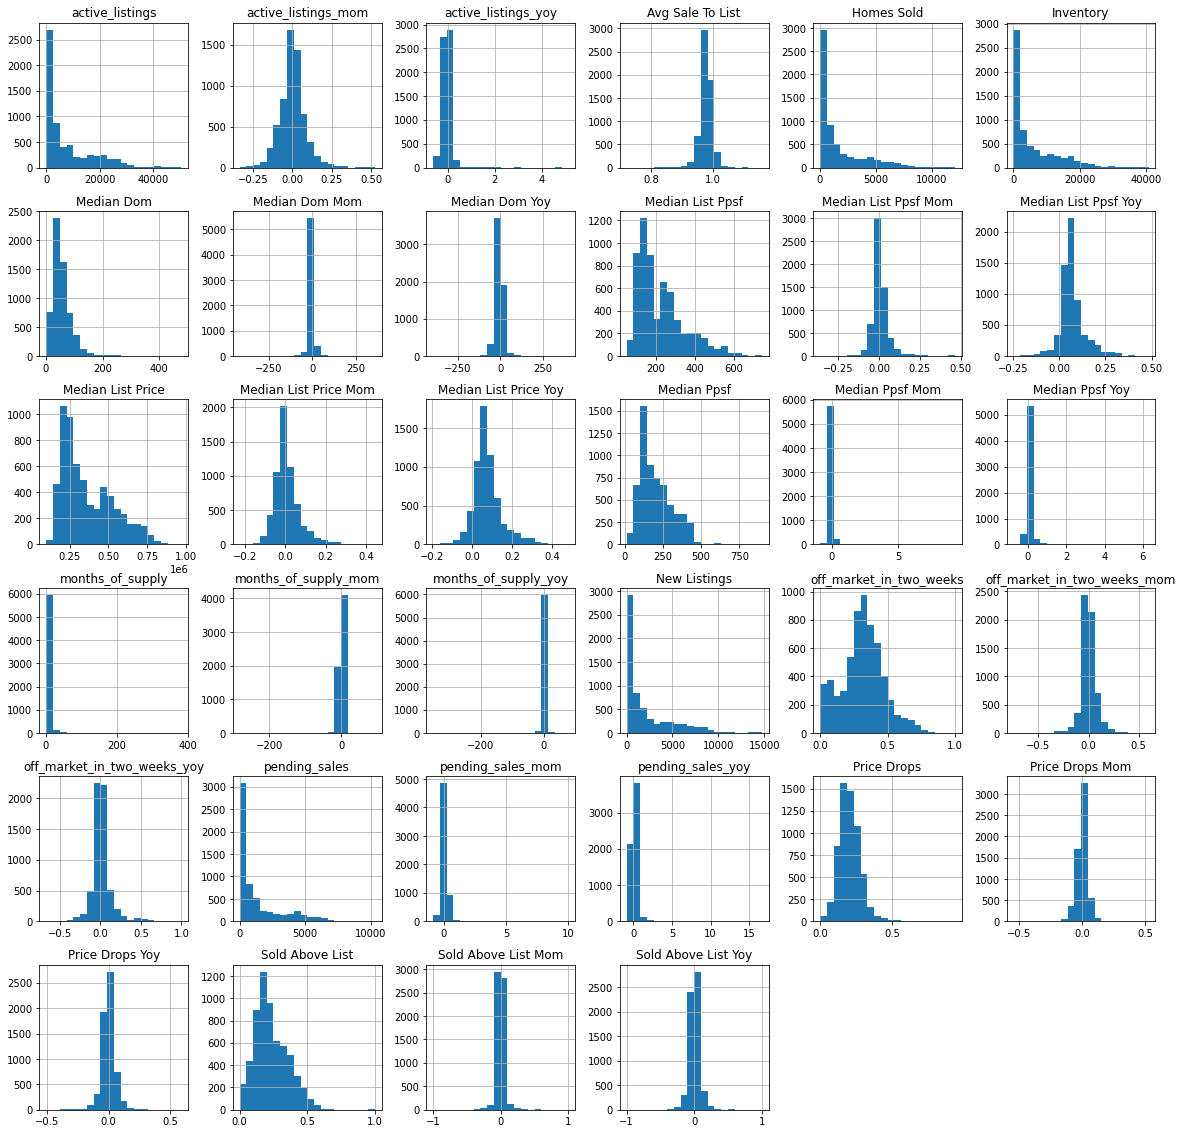

In [18]:
#look at overview of numerical data
hist = quant_vars.hist(bins=20, figsize=(20, 20))

At first glance, the graphs show that outliers may be present in some features.

## Outlier Detection with Numeric Data

0.0       12.0
0.1      261.2
0.2      691.0
0.3     1104.0
0.4     1596.0
0.5     2322.0
0.6     4142.2
0.7     6722.6
0.8    11525.2
0.9    17099.0
1.0    40885.0
Name: Inventory, dtype: float64

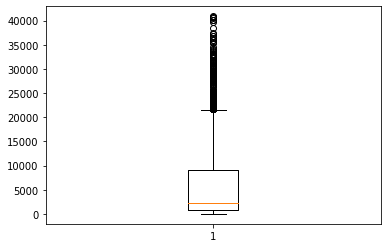

In [19]:
#Look at outliers for Inventory variable
plt.boxplot(quant_vars['Inventory'])
quant_vars['Inventory'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0     12.658263
0.1     94.652363
0.2    113.228004
0.3    130.103488
0.4    148.633804
0.5    176.470588
0.6    216.245516
0.7    250.800258
0.8    297.416320
0.9    370.895228
1.0    896.512256
Name: Median Ppsf, dtype: float64

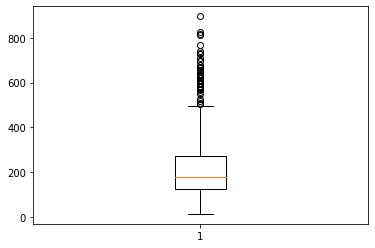

In [20]:
#Detect outliers for Median Ppsf variable
plt.boxplot(quant_vars['Median Ppsf'])
quant_vars['Median Ppsf'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0   -0.614997
0.1   -0.234457
0.2   -0.164485
0.3   -0.108603
0.4   -0.069312
0.5   -0.036902
0.6   -0.002417
0.7    0.033342
0.8    0.081745
0.9    0.149124
1.0    5.142857
Name: active_listings_yoy, dtype: float64

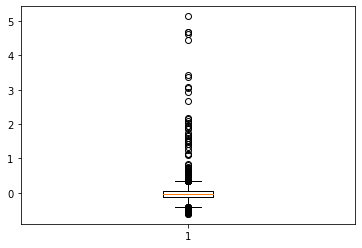

In [21]:
#Detect outliers for active listings yoy variable
plt.boxplot(quant_vars.active_listings_yoy)
quant_vars['active_listings_yoy'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

Looking and analyzing these outliers tells us that this data will produce larger differences. I am leaving the outliers because it is known that some homes/cities/locations achieve much larger inventories,median price per square feet, active listings and others depending on many different situations, therfore, I am leaving these outliers because they represent a real phenomenon within the data set. A certain market could contain these outliers and although it looks like an outlier when all the data is combined, it's not an outlier within it's own market.

I originally cleaned up the outliers and wasn't pleased with the results, it was taking away from too much of the real life data examples. 

## Lets convert Period End to Datetime format

In [22]:
merged['Period End'] =  pd.to_datetime(merged['Period End'])

In [23]:
#use housing as dataframe name instead of merged
housing = merged

### What does our feature variable look like?

In [24]:
#What does Median Ppsf summary of data look like 
housing['Median Ppsf'].describe()

count    6103.000000
mean      206.121991
std       108.810137
min        12.658263
25%       121.865607
50%       176.470588
75%       272.820734
max       896.512256
Name: Median Ppsf, dtype: float64

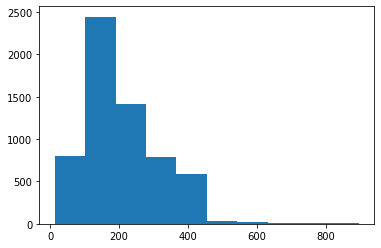

In [25]:
plt.hist(housing['Median Ppsf'])
plt.show()

In [26]:
print('Skew of Median Ppsf: ', housing['Median Ppsf'].skew())

Skew of Median Ppsf:  1.0066464431431463


Looks skewed toward the right with a skew of 1.00

I will use a log transformation to train the model to make the distribution less skewed. You can see what it will look like below

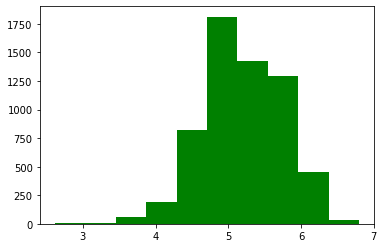

In [27]:
#View of logged transform for Median Ppsf
median_ppsf_log = np.log(housing['Median Ppsf']+1)
plt.hist(median_ppsf_log, color = 'green')
plt.show()

In [28]:
print('Skew of Log Transformed Sale Price: ', median_ppsf_log.skew())

Skew of Log Transformed Sale Price:  -0.26604769286094165


Skew is much closer to zero!

## Convert COVID housing percentages and strings to numeric.

In [29]:
#convert COVID housing percentages and strings to numeric.
housing['Avg Sale To List Mom'] = housing['Avg Sale To List Mom'].str.rstrip('%').astype('float') / 100.0
housing['Avg Sale To List Yoy'] = housing['Avg Sale To List Yoy'].str.rstrip('%').astype('float') / 100.0
housing['Homes Sold Mom'] = housing['Homes Sold Mom'].str.rstrip('%').astype('float') / 100.0
housing['Homes Sold Yoy'] = housing['Homes Sold Yoy'].str.rstrip('%').astype('float') / 100.0
housing['Inventory Mom'] = housing['Inventory Mom'].str.rstrip('%').astype('float') / 100.0
housing['Inventory Yoy'] = housing['Inventory Yoy'].str.rstrip('%').astype('float') / 100.0
housing['Median Sale Price Mom'] = housing['Median Sale Price Mom'].str.rstrip('%').astype('float') / 100.0
housing['Median Sale Price Yoy'] = housing['Median Sale Price Yoy'].str.rstrip('%').astype('float') / 100.0
housing['New Listings Mom'] = housing['New Listings Mom'].str.rstrip('%').astype('float') / 100.0
housing['New Listings Yoy'] = housing['New Listings Yoy'].str.rstrip('%').astype('float') / 100.0

In [30]:
housing['Median Sale Price'] = housing['Median Sale Price'].str.rstrip('K').str.lstrip('$').astype('float') * 100.0

## Visualize the Housing Data Heatmap

<AxesSubplot:>

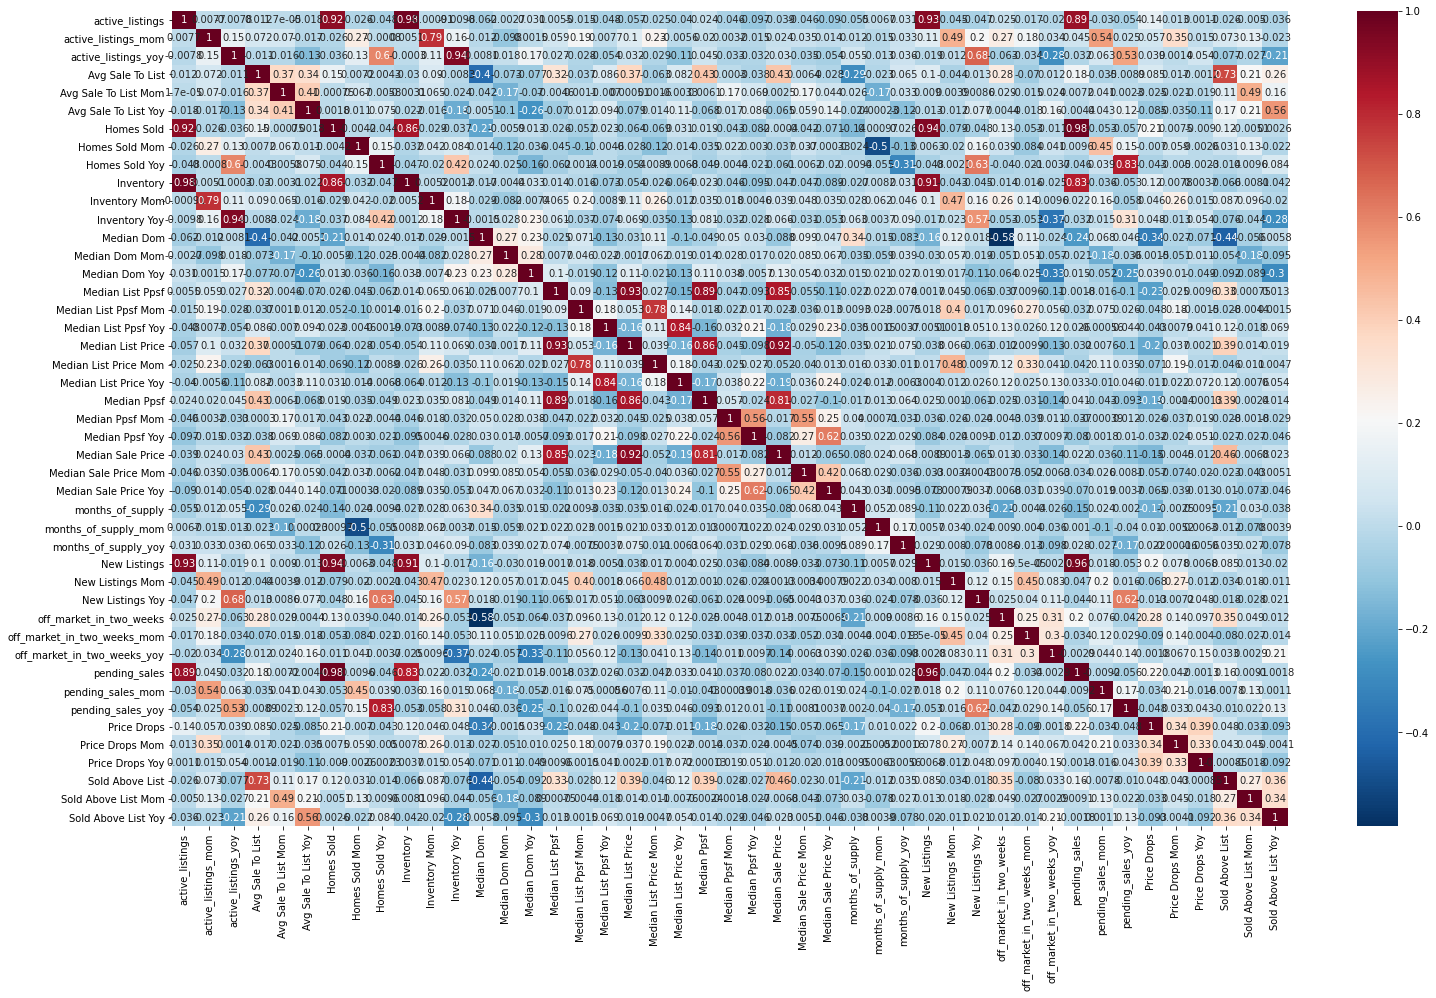

In [31]:
# Correlation heatmap
plt.subplots(figsize=(25,15))
ax = plt.axes()
corr = merged.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='RdBu_r',
            annot=True)

#### Strong positive correlation between multiple features
<ul>
<li>Active Listings : Homes Sold, Inventory, New Listings, Pending Sales</li>
</ul>

#### Strong negative correlation between multiple features
<ul>
<li>Median DOM : Sold Above List, Price Drops, Pending Sales, Off Market in Two Weeks, Homes Sold, Avg Sale to List </li>
</ul>


In [32]:
corr_matrix = housing.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.55)]
print(to_drop)

['Homes Sold', 'Homes Sold Yoy', 'Inventory', 'Inventory Mom', 'Inventory Yoy', 'Median List Price', 'Median List Price Mom', 'Median List Price Yoy', 'Median Ppsf', 'Median Ppsf Yoy', 'Median Sale Price', 'Median Sale Price Mom', 'Median Sale Price Yoy', 'New Listings', 'New Listings Yoy', 'off_market_in_two_weeks', 'pending_sales', 'pending_sales_yoy', 'Sold Above List', 'Sold Above List Yoy']


### Drop features with High multi-collinearity and Nan that is not relevant

In [33]:
housing = housing.drop(['Homes Sold', 'Homes Sold Yoy', 'Inventory', 'Inventory Mom', 'Inventory Yoy', 'Median List Ppsf', 'Median List Price Mom', 'Median List Price Yoy', 'Median Ppsf Yoy', 'Median Sale Price', 'Median Sale Price Mom', 'Median Sale Price Yoy', 'New Listings', 'New Listings Yoy', 'off_market_in_two_weeks', 'pending_sales', 'pending_sales_yoy', 'Sold Above List', 'Sold Above List Yoy'], axis=1)

### Lets take another look at the heatmap after dropped features

<AxesSubplot:>

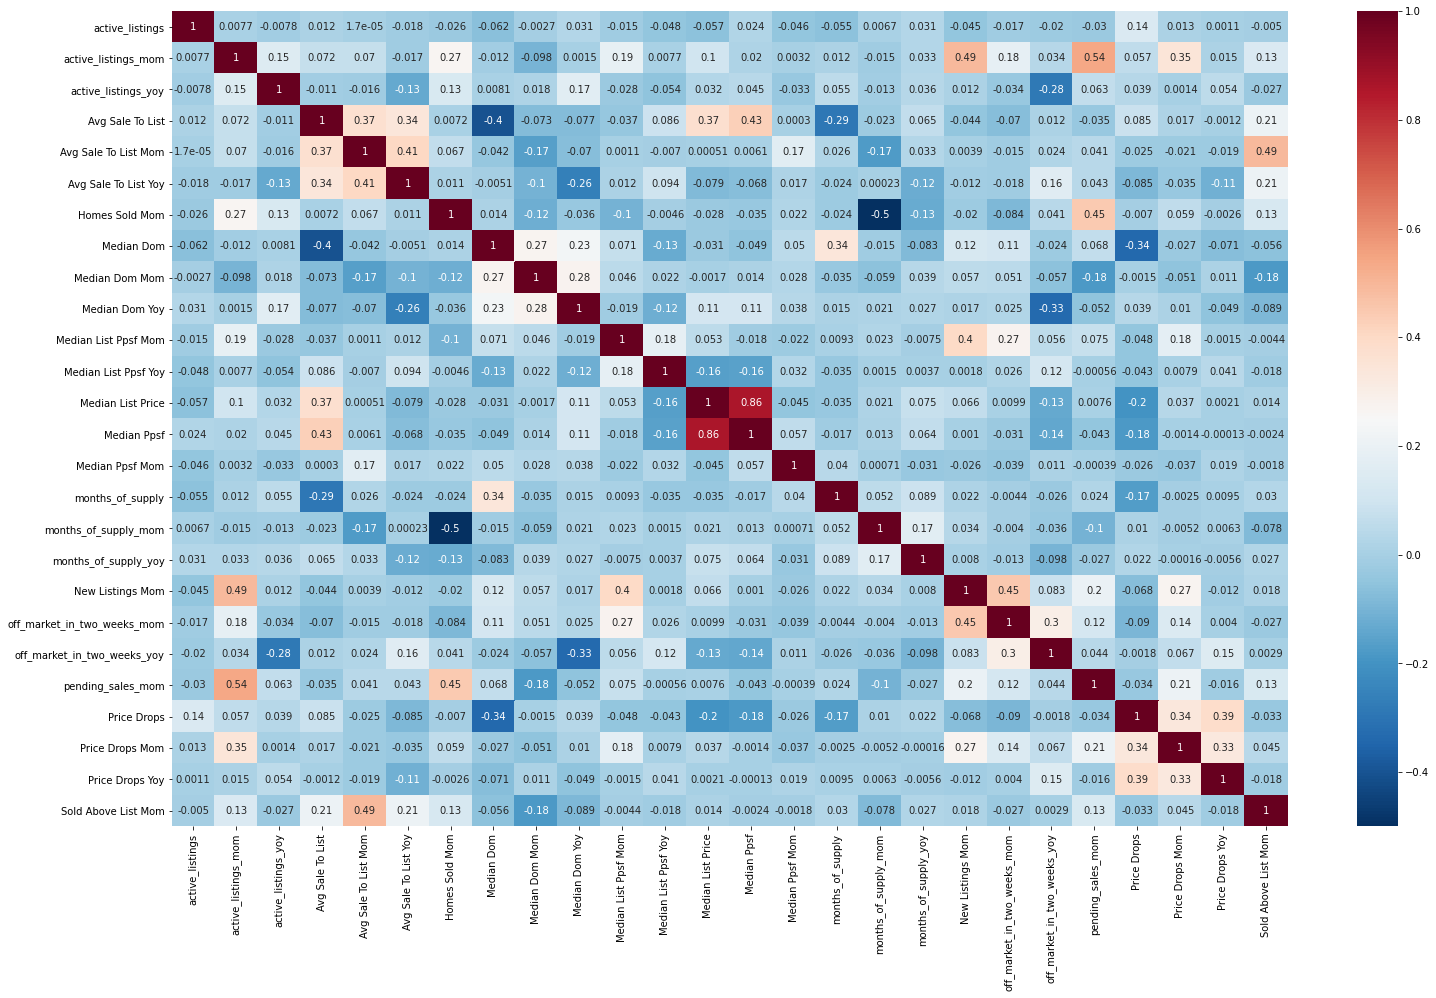

In [34]:
# Correlation heatmap
plt.subplots(figsize=(25,15))
ax = plt.axes()
corr = housing.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='RdBu_r',
            annot=True)

After dropping the high multi-collinearity features, the heat map is looking much better! I will drop Median List Price later because I would like to keep it for visualization.

## Visualize the COVID Data Heatmap

<AxesSubplot:>

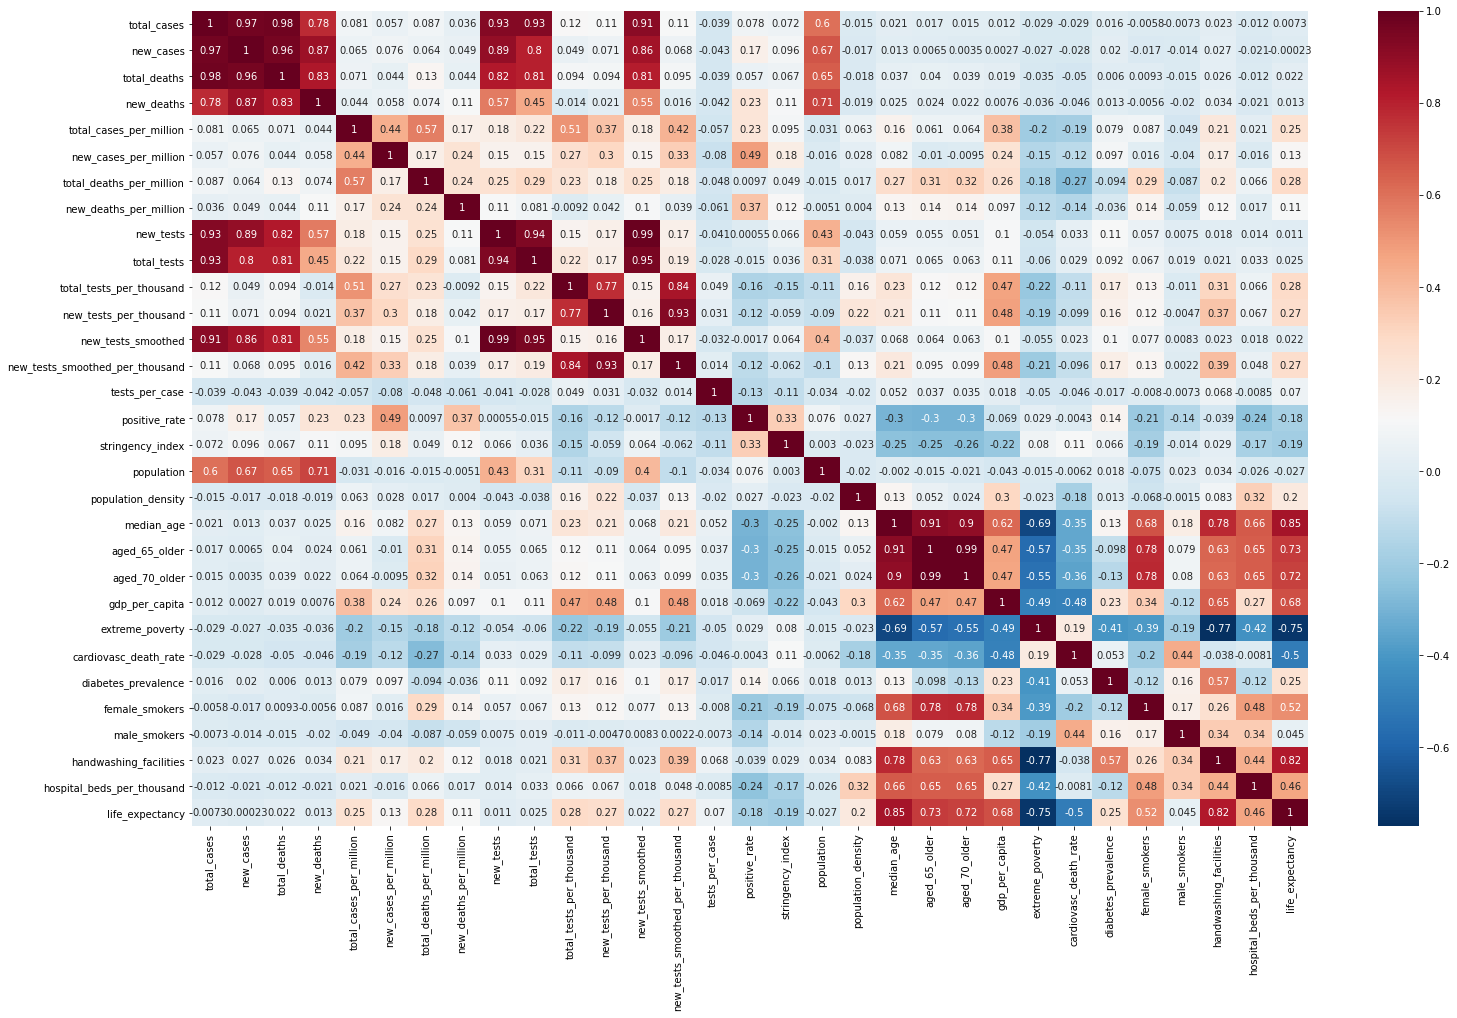

In [35]:
# Correlation heatmap
plt.subplots(figsize=(25,15))
ax = plt.axes()
corr = covid.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='RdBu_r',
            annot=True)

In [36]:
corr_matrix = covid.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.55)]
print(to_drop)

['new_cases', 'total_deaths', 'new_deaths', 'total_deaths_per_million', 'new_tests', 'total_tests', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'population', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'female_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy']


### Drop features with High multi-collinearity

In [37]:
covid = covid.drop(['iso_code','new_cases', 'total_deaths', 'new_deaths', 'total_deaths_per_million', 'new_tests', 'total_tests', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'population', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'female_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy','total_tests_per_thousand', 'tests_per_case',
       'positive_rate', 'tests_units', 'stringency_index'], axis=1)

<AxesSubplot:>

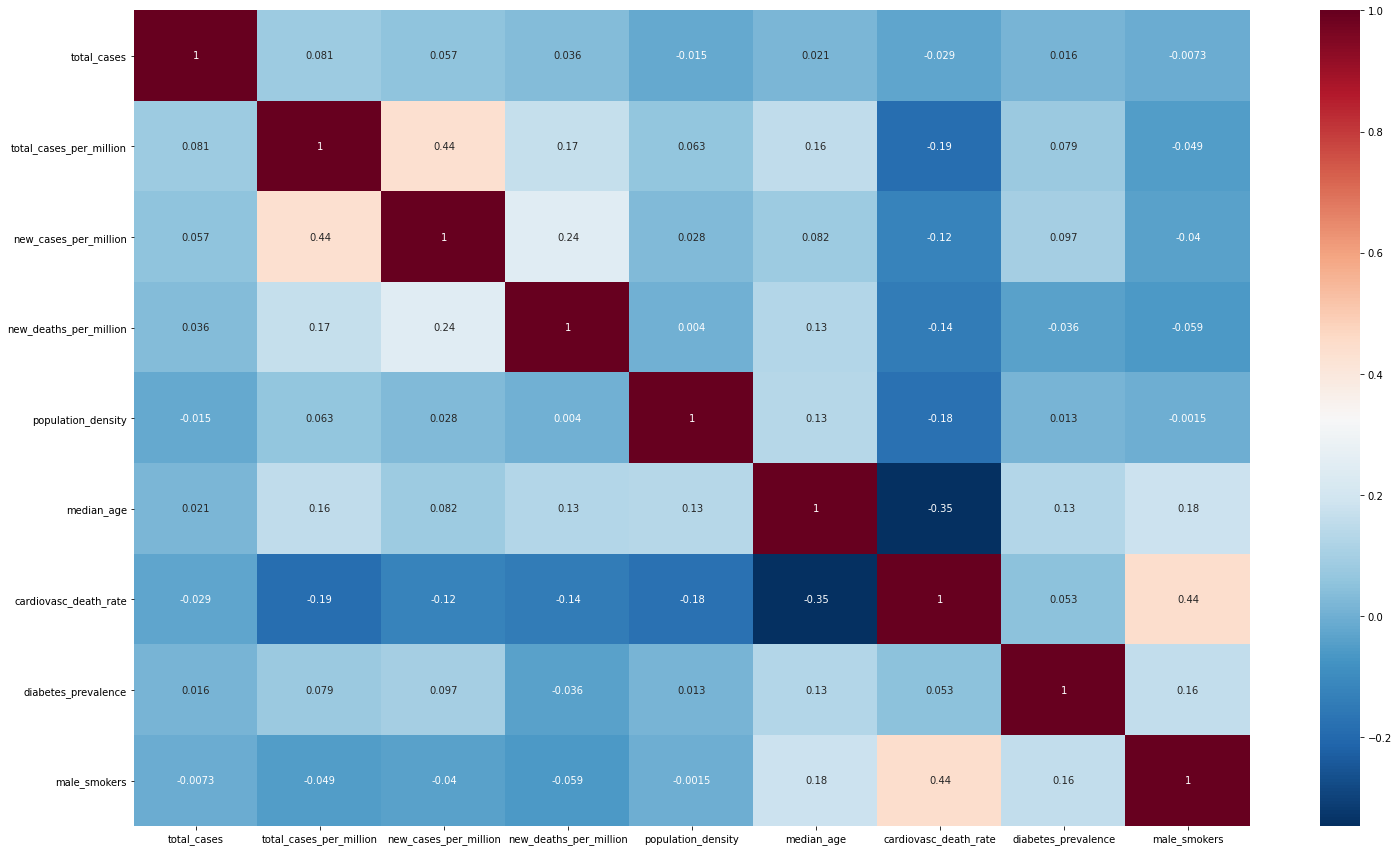

In [38]:
# Correlation heatmap
plt.subplots(figsize=(25,15))
ax = plt.axes()
corr = covid.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='RdBu_r',
            annot=True)

## Separate Housing Dataframe to Pre-COVID and during COVID

In [39]:
covid_housing = housing[(housing['Period End'] > '2019-12-30')]
housing = housing[(housing['Period End'] < '2019-12-31')]

Text(0.5, 1.0, 'Distribution plot: Median Ppsf for Housing data')

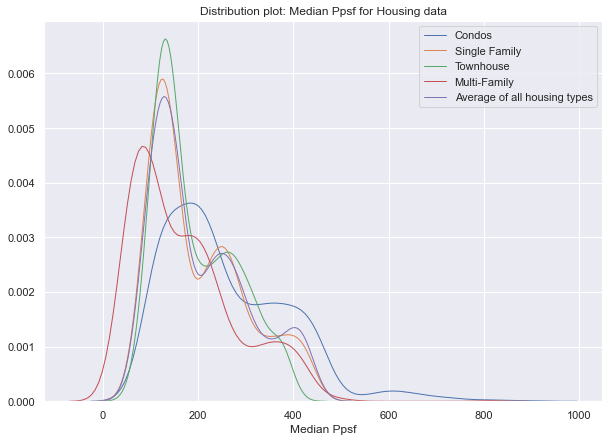

In [40]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,7))

#Median Ppsf and COVID Housing Data
sns.distplot(condos['Median Ppsf'], rug=False, hist=False, 
             kde_kws={"lw": 1, "label": "Condos"})
sns.distplot(single_family['Median Ppsf'], rug=False, hist=False, 
             kde_kws={"lw": 1, "label": "Single Family"})
sns.distplot(townhouse['Median Ppsf'], rug=False, hist=False, 
             kde_kws={"lw": 1, "label": "Townhouse"})
sns.distplot(multi_family['Median Ppsf'], rug=False, hist=False, 
             kde_kws={"lw": 1, "label": "Multi-Family"})
sns.distplot(all_homes['Median Ppsf'], rug=False, hist=False, 
             kde_kws={"lw": 1, "label": "Average of all housing types"})
plt.title('Distribution plot: Median Ppsf for Housing data')

Seems as if the different housing types are fairly similar with Multi-Family being the most right skewed. It seems as if Condos has the highest Median Ppsf. That makes sense... NY Condos are very expensive per square feet. Small and pricey = higher Ppsf.

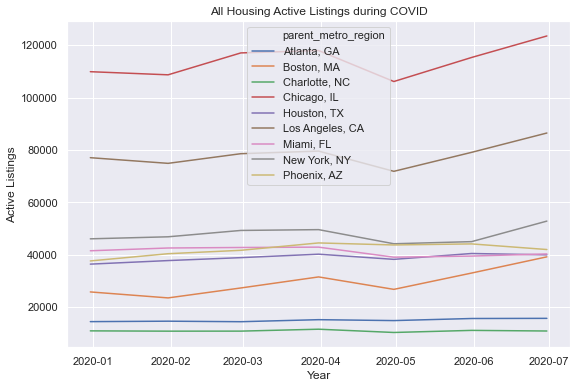

In [41]:
#Median Ppsf and COVID Housing Data
import seaborn as sns
plt.figure(figsize=(9,6))

monthly_revenue = covid_housing.groupby(['parent_metro_region', 'Period End'])['active_listings'].sum().reset_index()
monthly_revenue
sns.lineplot(x="Period End", y="active_listings",hue="parent_metro_region", data=monthly_revenue)
plt.xlabel('Year')
plt.ylabel('Active Listings')
plt.title('All Housing Active Listings during COVID')
plt.show()

Active listings increase the greatest in Chicago, LA, NY and Boston. This makes sense as people/families are realizing how much they value their space/yards and are realizing that they can work from home anywhere. Places that are already more rural either have no change or lower active listings. It could be that the Sellers from other markets are purchasing in those areas.

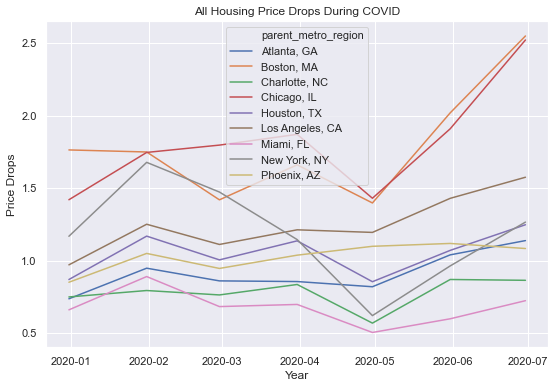

In [42]:
#Price Drops and COVID Housing Data
import seaborn as sns
plt.figure(figsize=(9,6))

monthly_revenue = covid_housing.groupby(['parent_metro_region', 'Period End'])['Price Drops'].sum().reset_index()
monthly_revenue
sns.lineplot(x="Period End", y="Price Drops",hue="parent_metro_region", data=monthly_revenue)
plt.xlabel('Year')
plt.ylabel('Price Drops')
plt.title('All Housing Price Drops During COVID')
plt.show()

This validates what we saw in the above graph. Homes in Boston, Chicago, Los Angeles and NY have higher rates of Price Drops whereas Phoenix, Miami, Charlotte and Atlanta stayed around the same from where they started.

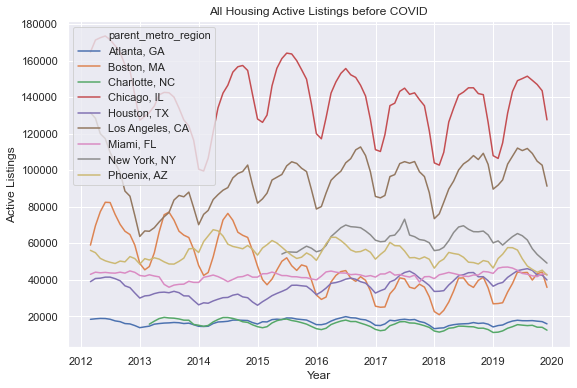

In [43]:
#Pre COVID Housing Active Listings
import seaborn as sns
plt.figure(figsize=(9,6))

monthly_revenue = housing.groupby(['parent_metro_region', 'Period End'])['active_listings'].sum().reset_index()
monthly_revenue
sns.lineplot(x="Period End", y="active_listings",hue="parent_metro_region", data=monthly_revenue)
plt.xlabel('Year')
plt.ylabel('Active Listings')
plt.title('All Housing Active Listings before COVID')
plt.show()

Average trends of housing data active listings in different parent metro regions

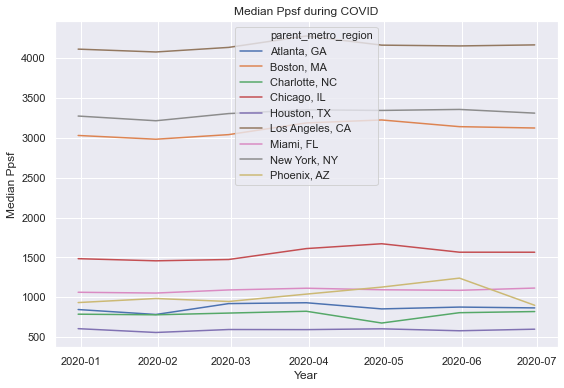

In [44]:
#COVID Housing Data Median Ppsf
import seaborn as sns
plt.figure(figsize=(9,6))

monthly_revenue = covid_housing.groupby(['parent_metro_region', 'Period End'])['Median Ppsf'].sum().reset_index()
monthly_revenue
sns.lineplot(x="Period End", y="Median Ppsf",hue="parent_metro_region", data=monthly_revenue)
plt.xlabel('Year')
plt.ylabel('Median Ppsf')
plt.title('Median Ppsf during COVID')
plt.show()

Not much fluctuation during COVID with housing data looking at Median Ppsf

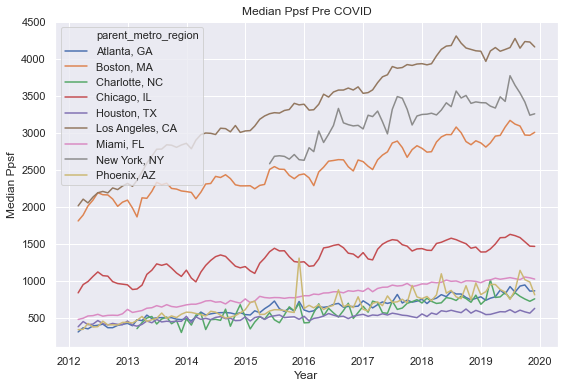

In [45]:
#Pre COVID Housing Data Median Ppsf
import seaborn as sns
plt.figure(figsize=(9,6))

monthly_revenue = housing.groupby(['parent_metro_region', 'Period End'])['Median Ppsf'].sum().reset_index()
monthly_revenue
sns.lineplot(x="Period End", y="Median Ppsf",hue="parent_metro_region", data=monthly_revenue)
plt.xlabel('Year')
plt.ylabel('Median Ppsf')
plt.title('Median Ppsf Pre COVID')
plt.show()

Average trends of housing data median ppsf in different parent metro regions

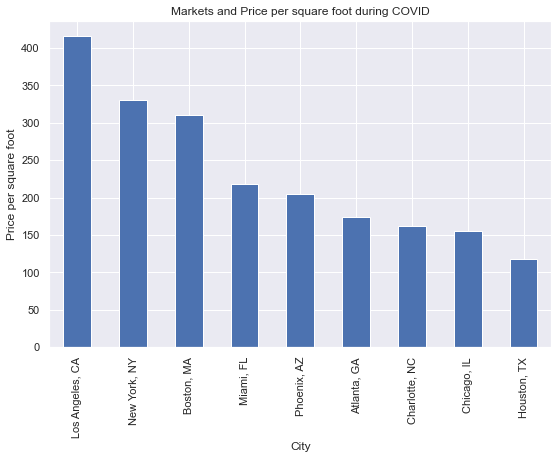

In [46]:
#Markets and Price per square foot during COVID
plt.figure(figsize=(9,6))
top_cities = covid_housing.groupby(['parent_metro_region'])['Median Ppsf'].mean().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Markets and Price per square foot during COVID')
plt.xlabel('City')
plt.ylabel('Price per square foot')
plt.show()

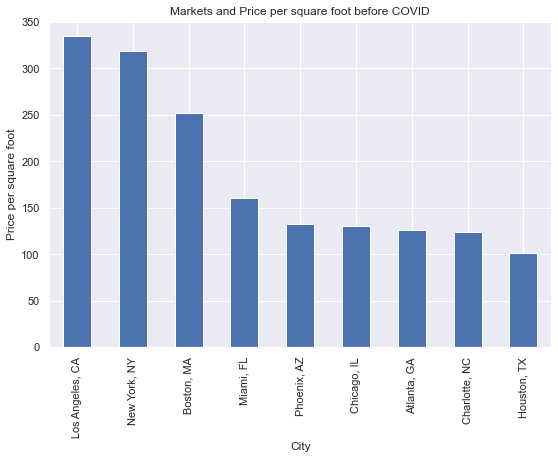

In [47]:
#Markets and Price per square foot before COVID
plt.figure(figsize=(9,6))
top_cities = housing.groupby(['parent_metro_region'])['Median Ppsf'].mean().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Markets and Price per square foot before COVID')
plt.xlabel('City')
plt.ylabel('Price per square foot')
plt.show()

### Lets look at the relationship with Active Listings, Median PPsf, Price Drops and Avg Sale To List.

array([[<AxesSubplot:xlabel='active_listings', ylabel='active_listings'>,
        <AxesSubplot:xlabel='Median Ppsf', ylabel='active_listings'>,
        <AxesSubplot:xlabel='Price Drops', ylabel='active_listings'>,
        <AxesSubplot:xlabel='Avg Sale To List', ylabel='active_listings'>],
       [<AxesSubplot:xlabel='active_listings', ylabel='Median Ppsf'>,
        <AxesSubplot:xlabel='Median Ppsf', ylabel='Median Ppsf'>,
        <AxesSubplot:xlabel='Price Drops', ylabel='Median Ppsf'>,
        <AxesSubplot:xlabel='Avg Sale To List', ylabel='Median Ppsf'>],
       [<AxesSubplot:xlabel='active_listings', ylabel='Price Drops'>,
        <AxesSubplot:xlabel='Median Ppsf', ylabel='Price Drops'>,
        <AxesSubplot:xlabel='Price Drops', ylabel='Price Drops'>,
        <AxesSubplot:xlabel='Avg Sale To List', ylabel='Price Drops'>],
       [<AxesSubplot:xlabel='active_listings', ylabel='Avg Sale To List'>,
        <AxesSubplot:xlabel='Median Ppsf', ylabel='Avg Sale To List'>,
        <AxesSub

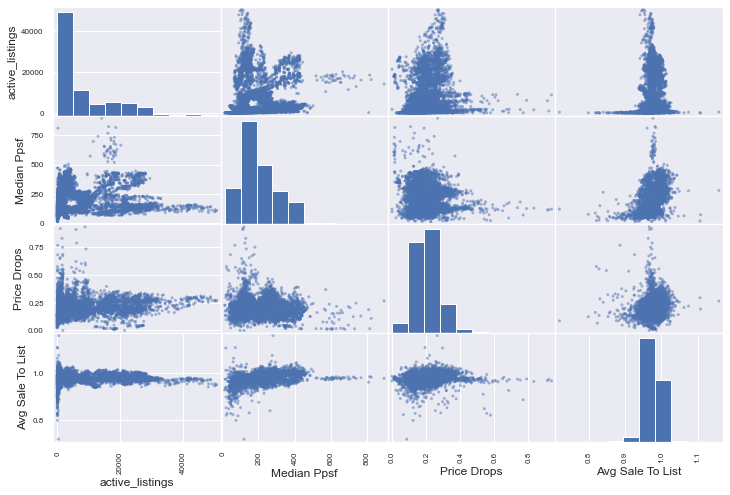

In [48]:
from pandas.plotting import scatter_matrix
attributes = ['active_listings', 'Median Ppsf',
             'Price Drops', 'Avg Sale To List']
scatter_matrix(housing[attributes], figsize=(12,8))

With lower active_listings, it looks like the Median Ppsf increases, which makes sense. Supply and Demand. As more listings come available, lower demand which means lower ppsf. It seems that many active listings receive price drops and the average sale to list price is around what the list price is, which makes sense.

## Look at COVID data

In [49]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35507 entries, 0 to 35506
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   continent                35221 non-null  object 
 1   location                 35507 non-null  object 
 2   date                     35507 non-null  object 
 3   total_cases              35162 non-null  float64
 4   total_cases_per_million  35098 non-null  float64
 5   new_cases_per_million    35098 non-null  float64
 6   new_deaths_per_million   35098 non-null  float64
 7   population_density       33890 non-null  float64
 8   median_age               31924 non-null  float64
 9   cardiovasc_death_rate    31949 non-null  float64
 10  diabetes_prevalence      33024 non-null  float64
 11  male_smokers             24987 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.3+ MB


In [50]:
#What features have null rows?
covid.isnull().sum()

continent                    286
location                       0
date                           0
total_cases                  345
total_cases_per_million      409
new_cases_per_million        409
new_deaths_per_million       409
population_density          1617
median_age                  3583
cardiovasc_death_rate       3558
diabetes_prevalence         2483
male_smokers               10520
dtype: int64

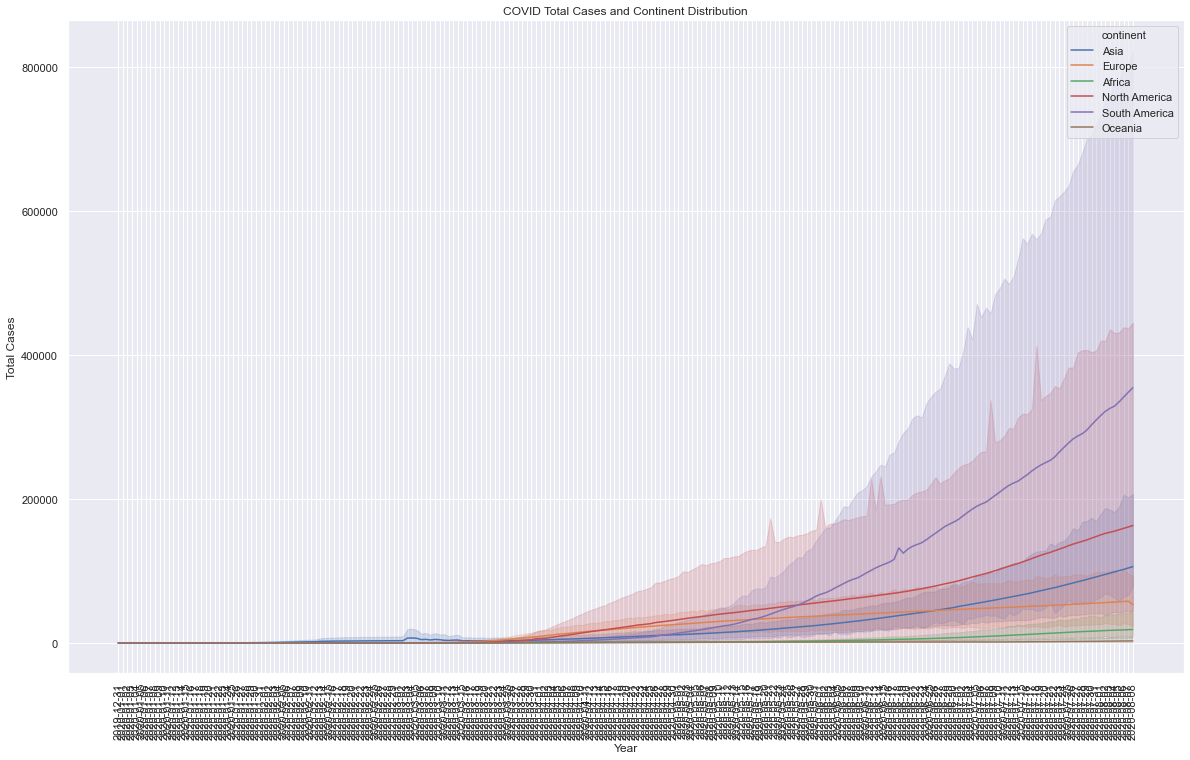

In [51]:
#COVID New Cases and Continent Distribution
import seaborn as sns
plt.figure(figsize=(20,12))

monthly_revenue = covid.groupby(['continent', 'date'])['total_cases'].sum().reset_index()
monthly_revenue
sns.lineplot(x="date", y="total_cases",hue="continent", data=covid)
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Total Cases')
plt.title('COVID Total Cases and Continent Distribution')
plt.show()

## Get COVID and Housing Data ready to Merge into 1 dataframe

In [52]:
#Change location to World so we can get overview of COVID and drop Continent (Nan)
covid = covid.drop(['continent'], axis=1)
covid = covid.loc[covid['location'] == 'World']

In [53]:
#Convert COVID date to datetime format
covid['date'] = covid['date'].apply(pd.to_datetime)

In [54]:
#Groupby date to match housing frequency of each month
covid = covid.groupby(pd.Grouper(key='date', freq='1M')).sum() # groupby each 1 month

In [55]:
#Reset the index
covid = covid.reset_index()
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     9 non-null      datetime64[ns]
 1   total_cases              9 non-null      float64       
 2   total_cases_per_million  9 non-null      float64       
 3   new_cases_per_million    9 non-null      float64       
 4   new_deaths_per_million   9 non-null      float64       
 5   population_density       9 non-null      float64       
 6   median_age               9 non-null      float64       
 7   cardiovasc_death_rate    9 non-null      float64       
 8   diabetes_prevalence      9 non-null      float64       
 9   male_smokers             9 non-null      float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 848.0 bytes


In [56]:
#Rename Period End to Date 
housing = housing.rename(columns= {'Period End' : 'date'})
covid_housing = covid_housing.rename(columns= {'Period End' : 'date'})

## Merge COVID Data with Housing Data of same date

In [57]:
# Merge COVID data and COVID Housing Data on Date
covid_housing = covid_housing.merge(covid, left_on='date', right_on='date')

covid_housing.head()

Month of Period End              Property Type parent_metro_region  \
0        January 2020            All Residential       Charlotte, NC   
1        January 2020  Single Family Residential         Chicago, IL   
2        January 2020    Multi-Family (2-4 Unit)         Houston, TX   
3        January 2020    Multi-Family (2-4 Unit)           Miami, FL   
4        January 2020  Single Family Residential          Boston, MA   

        date  active_listings  active_listings_mom  active_listings_yoy  \
0 2020-01-31             5465            -0.010502            -0.039712   
1 2020-01-31            11892            -0.022843             0.012602   
2 2020-01-31              180             0.034483             0.200000   
3 2020-01-31              523             0.013566            -0.088850   
4 2020-01-31             5008            -0.129800            -0.153768   

   Avg Sale To List  Avg Sale To List Mom  Avg Sale To List Yoy  ...  \
0          0.979983                -0.001                 0.001  ...   
1          0.964708                -0.001                 0.000  ...   
2          0.944459                -0.024                -0.021  ...   
3          0.920385                -0.011                -0.029  ...   
4          0.982818                -0.005                 0.000  ...   

   Sold Above List Mom  total_cases  total_cases_per_million  \
0            -0.003580      38411.0                    4.932   
1             0.000768      38411.0                    4.932   
2             0.000000      38411.0                    4.932   
3             0.007705      38411.0                    4.932   
4            -0.025916      38411.0                    4.932   

   new_cases_per_million  new_deaths_per_million  population_density  \
0                  1.256                   0.026            1799.395   
1                  1.256                   0.026            1799.395   
2                  1.256                   0.026            1799.395   
3                  1.256                   0.026            1799.395   
4                  1.256                   0.026            1799.395   

   median_age  cardiovasc_death_rate  diabetes_prevalence  male_smokers  
0       957.9                7225.17               263.81      1073.685  
1       957.9                7225.17               263.81      1073.685  
2       957.9                7225.17               263.81      1073.685  
3       957.9                7225.17               263.81      1073.685  
4       957.9                7225.17               263.81      1073.685  

[5 rows x 39 columns]

In [58]:
print(housing['Median Ppsf'].mean())
print(covid_housing['Median Ppsf'].mean())

202.27318531221974
254.01163933546275


Average prices per square foot after COVID are higher, that is also what we saw in our visualizations

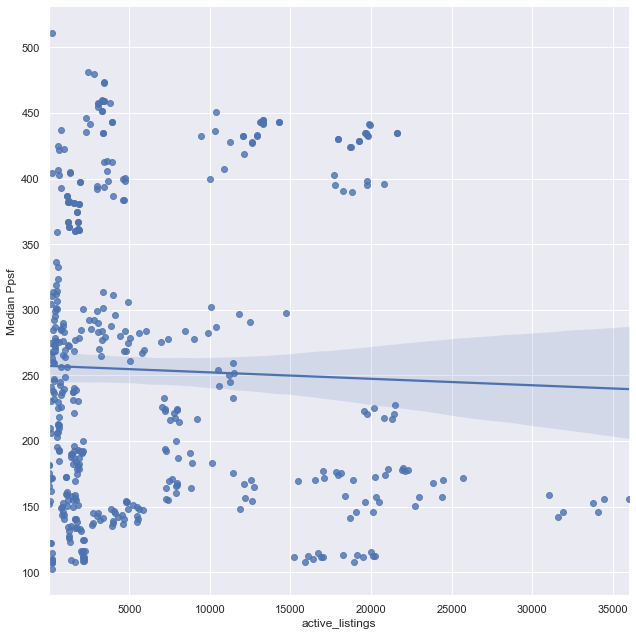

In [59]:
#Look at Active Listings and Median Ppsf relationship before COVID
sns.lmplot(x='active_listings', y = 'Median Ppsf', data=covid_housing, height = 9)

Makes sense. The more active listings, the lower the median ppsf.
Supply and demand.

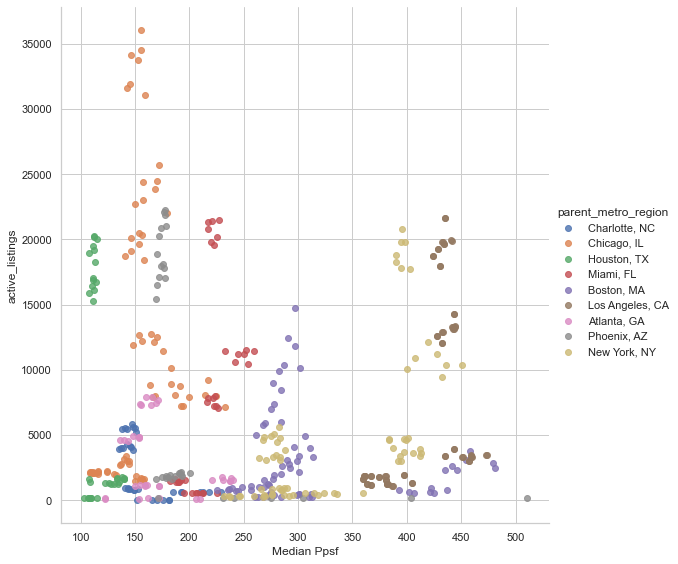

In [60]:
sns.set_style('whitegrid')
sns.lmplot('Median Ppsf','active_listings',data=covid_housing, hue='parent_metro_region',
           size=8,aspect=1,fit_reg=False)

Seems as if many parent metro regions havent fluctuated much in Median Ppsf during COVID. The largest difference in Median Ppsf is Boston jumping from 225 ppsf to 475 ppsf

In [61]:
#Even though there aren't any NA, this is just to reiterate
covid_housing = covid_housing[covid_housing['total_cases'].notna()]

(array([18262., 18293., 18322., 18353., 18383., 18414., 18444.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

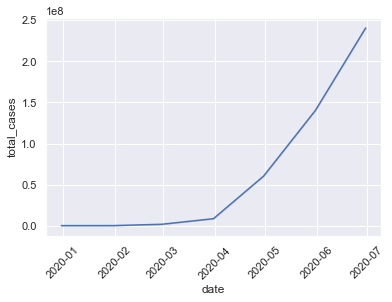

In [62]:
#Lets look at Total Cases in the World of COVID
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="date", y="total_cases", data=covid_housing)
plt.xticks(rotation=45)

There aren't any signs of the disease slowing down in cases when looking at total cases and date.

In [63]:
cor_matrix = covid_housing.corr()
cor_matrix['Median Ppsf'].sort_values(ascending=False)

Median Ppsf                    1.000000
Median List Price              0.862947
Avg Sale To List               0.381484
months_of_supply               0.200014
months_of_supply_yoy           0.183477
months_of_supply_mom           0.092661
Median Dom                     0.088594
Median Ppsf Mom                0.066637
New Listings Mom               0.065293
active_listings_mom            0.053195
new_deaths_per_million         0.039580
Median Dom Yoy                 0.033325
new_cases_per_million          0.027558
diabetes_prevalence            0.021661
cardiovasc_death_rate          0.021661
population_density             0.021661
male_smokers                   0.021661
median_age                     0.021661
Median Dom Mom                 0.019572
total_cases                    0.015276
total_cases_per_million        0.015276
Sold Above List Mom            0.013193
Avg Sale To List Mom          -0.006497
off_market_in_two_weeks_mom   -0.008798
Avg Sale To List Yoy          -0.030256


Drop Median Sale Price, I don't like that it's 86% correlated with Median Ppsf.

In [64]:
covid_housing = covid_housing.drop(['Median List Price'], axis=1)

## Split Data into Class/Training Groups
#### Take first 2/3 for training set, take last 1/3 for test set.

In [65]:
#Sort by date to set up the training groups
covid_housing = covid_housing.sort_values(by = ['date'])

The reason I sorted the values by date was to be able to predict future Median Ppsf

### Train test split

In [66]:
# Linear Model for the  train and test
y = np.log(covid_housing['Median Ppsf'])
X = covid_housing.drop(['Median Ppsf', 'Month of Period End', 'date', 'Property Type'], axis=1)

#In order to have the states as a feature I need use get_dummies
X = pd.get_dummies(X)
X = X.round(4)
y = y.round(0)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, shuffle=False)

In [67]:
#Lets look at the training and test shapes
print(X_train.shape)
print(X_test.shape)

(340, 42)
(114, 42)


In [68]:
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 340
The number of observations in test set is 114


# Feature Selection

## Principal Component Analysis (PCA)

In [69]:
# Standardizing the features
x_stand = StandardScaler().fit_transform(X)

# PCA to keep 95% of variance
pca = PCA(0.95)

# Components required to keep 95% of variance
x_pca = pca.fit_transform(x_stand)

# Cumulative sum of explained variance by the components
var_cumsum=pca.explained_variance_ratio_.cumsum()
print(var_cumsum)
print('\n')
print('Need to keep {} components to explain 95% of the variance.'.format(len(var_cumsum)))


[0.18192287 0.2777784  0.36569594 0.44279409 0.50567463 0.56161341
 0.60959104 0.65032401 0.68316869 0.7126351  0.74091391 0.76803226
 0.79481634 0.81819732 0.83763422 0.85683831 0.87428824 0.8897647
 0.90339672 0.91611939 0.92741672 0.93773771 0.94795703 0.95554961]


Need to keep 24 components to explain 95% of the variance.


<Figure size 432x432 with 0 Axes>

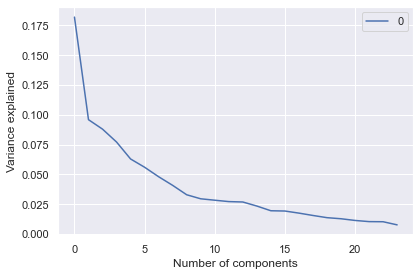

In [70]:
# Scree plot
plt.figure(figsize=(6,6))
pd.DataFrame(list(pca.explained_variance_ratio_)).plot(kind='line')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')

plt.tight_layout()
plt.show()

## K-Nearest Neighbors
#### Base Model

In [71]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


# Run KNN
neigh = KNeighborsRegressor(n_neighbors=3)
# Fit the model
neigh.fit(X_train, y_train)
# Cross Validation
score = cross_val_score(neigh, X, y, cv=5)

# We are making predictions here
y_preds_train = neigh.predict(X_train)
y_preds_test = neigh.predict(X_test)

# Report
print("-----Accuracy Score statistics-----")
print('Cross_Val_Score: {}'.format(score))
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print("-----Train set statistics-----")
print("R-squared of the model in training set is: {}".format(neigh.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(neigh.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

-----Accuracy Score statistics-----
Cross_Val_Score: [-0.31534812 -0.42141707  0.15658537 -0.19672571 -0.03066868]
Unweighted Accuracy: -0.16 (+/- 0.41)
-----Train set statistics-----
R-squared of the model in training set is: 0.39747732721776263
-----Test set statistics-----
R-squared of the model in test set is: -0.21520833333333367
Mean absolute error of the prediction is: 0.476608187134503
Mean squared error of the prediction is: 0.2992202729044836
Root mean squared error of the prediction is: 0.5470103042032056
Mean absolute percentage error of the prediction is: 9.064327485380112


 Lower values are desirable for all four metrics. The lower the value, the better the performance of the model. As we can see, the R-squared of the model in the training set is 0.398, whereas it's -.215 in the test set. KNN did not do a good job predicting the model. It doesn't seem to find the distances between a query and the examples in the data. Even with parameter tuning it still failed to produce any promising accuracies.

## Decision Tree Regressor

In [72]:
from sklearn.tree import DecisionTreeRegressor
import time
start_time = time.time()
# Run Decision Tree
dtr = DecisionTreeRegressor(random_state=1)
# Fit the model
dtr.fit(X_train, y_train)
# We are making predictions here
y_preds_train = dtr.predict(X_train)
y_preds_test = dtr.predict(X_test)

print("R-squared of the model in training set is: {}".format(dtr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(dtr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
print("--- %s seconds ---" % round(time.time() - start_time, 2))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.78625
Mean absolute error of the prediction is: 0.05263157894736842
Mean squared error of the prediction is: 0.05263157894736842
Root mean squared error of the prediction is: 0.22941573387056177
Mean absolute percentage error of the prediction is: 1.023391812865497
--- 0.02 seconds ---


As we can see, the R-squared of the model in the training set is 1.0, whereas it's 0.786 in the test set. Decision Tree Regressor did a promising job predicting the model, however such a high training set often time is overfit especially when Decision Trees are prone to overfitting and they are sensitive to the specific data on which they are trained.

## Random Forest Regressor
#### Base Model

In [73]:
from sklearn.ensemble import RandomForestRegressor
# Run Random Forest
rf = RandomForestRegressor(n_estimators=10)
# Fit the model
rf = rf.fit(X_train, y_train)
# Cross Validation
score = cross_val_score(rf, X, y, cv=5)

# We are making predictions here
y_preds_train = rf.predict(X_train)
y_preds_test = rf.predict(X_test)

print("-----Accuracy Score statistics-----")
print('Cross_Val_Score: {}'.format(score))
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print("-----Train set statistics-----")
print("R-squared of the model in training set is: {}".format(rf.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(rf.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

-----Accuracy Score statistics-----
Cross_Val_Score: [0.84727905 0.91119807 0.75496585 0.85228986 0.80859729]
Unweighted Accuracy: 0.83 (+/- 0.10)
-----Train set statistics-----
R-squared of the model in training set is: 0.9707008582647069
-----Test set statistics-----
R-squared of the model in test set is: 0.8617750000000001
Mean absolute error of the prediction is: 0.08070175438596487
Mean squared error of the prediction is: 0.03403508771929823
Root mean squared error of the prediction is: 0.18448600954895802
Mean absolute percentage error of the prediction is: 1.4678362573099406


In [74]:
# Saving the feature names
feature_list = list(X_train.columns)
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [75]:
feature_importances = feature_importances[:20]

In [76]:
feature_importances

[('parent_metro_region_New York, NY', 0.29),
 ('Avg Sale To List', 0.26),
 ('parent_metro_region_Boston, MA', 0.15),
 ('parent_metro_region_Los Angeles, CA', 0.11),
 ('Median Dom', 0.04),
 ('off_market_in_two_weeks_yoy', 0.03),
 ('Avg Sale To List Yoy', 0.02),
 ('Sold Above List Mom', 0.02),
 ('active_listings', 0.01),
 ('Avg Sale To List Mom', 0.01),
 ('Median List Ppsf Yoy', 0.01),
 ('Median Ppsf Mom', 0.01),
 ('months_of_supply_yoy', 0.01),
 ('New Listings Mom', 0.01),
 ('Price Drops Yoy', 0.01),
 ('active_listings_mom', 0.0),
 ('active_listings_yoy', 0.0),
 ('Homes Sold Mom', 0.0),
 ('Median Dom Mom', 0.0),
 ('Median Dom Yoy', 0.0)]

This model performed promising accuracies and predictions. Since Random Forest combines multiple predictions of individual trees and pulling random samples from original dataset, it helps prevent overfitting. I am satisified with this model. This Random Forest Regression Model performed with a training R-squared score of 0.971, a test R-squared score of 0.853 and a cross-validated score of 0.850. I've also printed the feature importances to show the low collinearity of features to show low overfitting practices. A MAE of 0 means that your model is a perfect predictor of the outputs so our model seems satisfactory when looking at MAE as well. When looking at MAPE, it tells how how far the model’s predictions are off from their corresponding outputs on average. In this case, our Random Forest Regressor has a percentage error of 1.257%

## Random Forest Parameter Tuning
#### Even with Random Forest Parameter Tuning, the results were very interesting in that they were so similar, it wasn't worth keeping.

## Let's look at the statistical significance of individual coefficients and Ordinary Least Squares.

In [77]:
import statsmodels.api as sm
X_trains = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_trains).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Median Ppsf   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     65.12
Date:                Sun, 06 Sep 2020   Prob (F-statistic):          3.78e-122
Time:                        10:52:55   Log-Likelihood:                 127.07
No. Observations:                 340   AIC:                            -178.1
Df Residuals:                     302   BIC:                            -32.64
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

According to the estimation results, the constant term is 7.486. The coefficient of all the features is very close to zero. We see that the p-value of all except Active Listings, Active Listings Mom, Avg Sale To List Mom along with a few more, is over 0.05, whereas the p-value of all other features are very close to zero. This implies that the coefficient of the above listed is effectively zero from a statistical point of view. It's simply not significant, and we can say that there appears to be no relationship between Median Price Per Square feet and the aboce listed.

On the other hand, the other features are important factor in the Median Ppsf. According to the estimation, since the coefficients are so low, the Median Ppsf doesn't change much for the features that are significant.

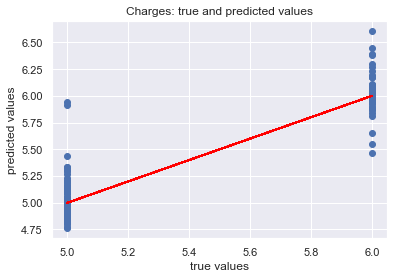

Mean absolute error of the prediction is: 0.14852374906966184
Mean squared error of the prediction is: 0.04691683653948536
Root mean squared error of the prediction is: 0.21660294674700378
Mean absolute percentage error of the prediction is: 2.7561298256454108


In [78]:
# We add constant to the model as it's a best practice
# to do so every time!
import statsmodels.api as sm
X_tests = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_tests)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


These predictions with Ordinary Least Squares are close to zero which validates that it's doing a satisfactory job predicting Median Ppsf.

In the graph, we see that our model doesn't predict the values very well visually, however, our R-squared is satisfactory. By using visualizations like this, we can't intuitively understand the performance of the models any better than without the visualization.

## Linear Regression

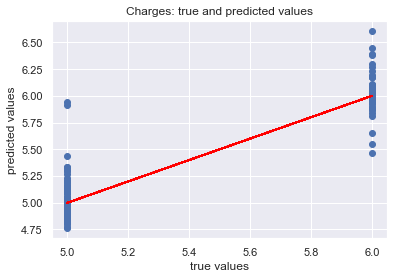

                            OLS Regression Results                            
Dep. Variable:            Median Ppsf   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     65.12
Date:                Sun, 06 Sep 2020   Prob (F-statistic):          3.78e-122
Time:                        10:52:56   Log-Likelihood:                 127.07
No. Observations:                 340   AIC:                            -178.1
Df Residuals:                     302   BIC:                            -32.64
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [79]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

# We add constant to the model as it's a best practice
# to do so every time!
X_trains = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_trains).fit()

# We print the summary results
print(results.summary())

print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

This model's F statistic is 65.12, and the associated p-value is very close to zero. This means that our features add some information to the reduced model and our model is useful in explaining Median Ppsf. As we can see, the R-squared of the model in the training set is 0.889, with an Adj. R-squared of 0.875 whereas it's 0.810 in the test set. Linear Regression did a promising job predicting the model, however such a high training set often time is overfit. 

In the graph, we see that our model doesn't predict the values very well visually, however, our R-squared is satisfactory. By using visualizations like this, we can't intuitively understand the performance of the models any better than without the visualization.

### Run Bartlett and Levene to check heteroscedasticity

In [80]:
predictions = lrm.predict(X)
errors = y - predictions

In [81]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 388.763 and p value is 1.54e-86
Levene test statistic value is 509.293 and p value is 7.76e-90


There may be several causes of heteroscedasticity. Examples include outliers (I left them in my model) in the data and omitted variables that are important in explaining the variance of the target variable. 

### Look at Autocorrelation

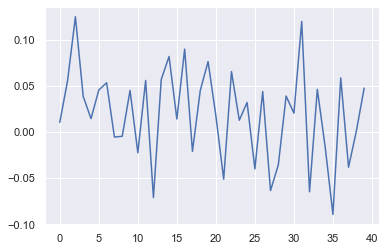

In [82]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

So, the autocorrelation between the errors of our Median Ppsf model is indeed low (ranging between -0.10 and 0.10).

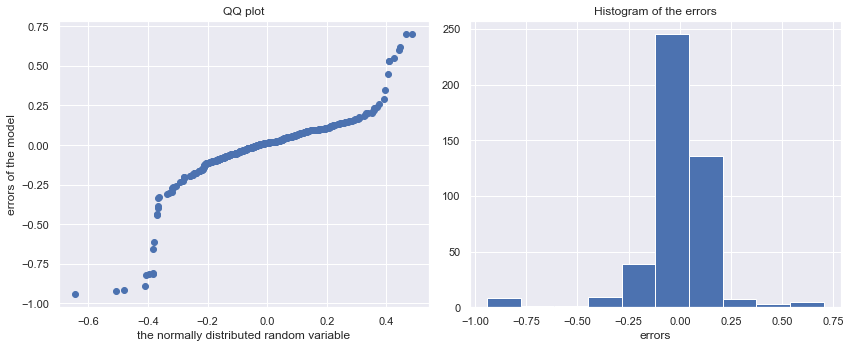

In [83]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

As can be seen in the charts above, our errors are not normally distributed exactly. But the QQ plot and the histogram imply that the distribution doesn't look normal. I will verify with Jarque_bera and normaltest

### Run Jarque and Normaltest to look at distribution

In [84]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [85]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1950.6990507240575 and p value is 0.0
Normality test statistics is 187.5044423553773 and p value is 1.92277150052643e-41


The p-values of both tests indicate that our errors are not normally distributed.

## Lasso CV

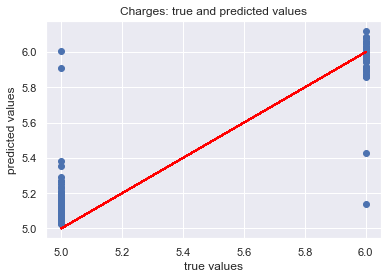

R-squared of the model in training set is: 0.8465263907647338
-----Test set statistics-----
R-squared of the model in test set is: 0.8312849159224864
Mean absolute error of the prediction is: 0.13118789007518175
Mean squared error of the prediction is: 0.04154264920345057
Root mean squared error of the prediction is: 0.20382013934704923
Mean absolute percentage error of the prediction is: 2.496392693851933


In [86]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

LASSO (Least Absolute Shrinkage and Selection Operator), on the other hand, works by trying to force small parameter estimates to be equal to zero, effectively dropping them from the model. This can prevent overfitting.

Lasso regression F statistic and the associated p-value is very close as the Linear Regression model. Like stated above, this means that our features add some information to the reduced model and our model is useful in explaining Median Ppsf. The R-squared of the model in the training set is 0.847, whereas it's 0.831 in the test set. 

In the graph, we see that our model doesn't predict the values very well visually, however, our R-squared is satisfactory. By using visualizations like this, we can't intuitively understand the performance of the models any better than without the visualization.

## Ridge Linear Model

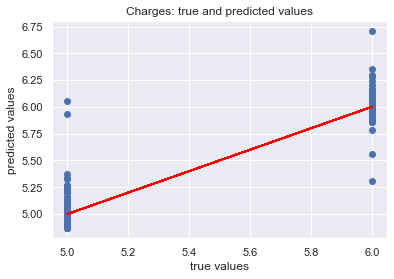

R-squared of the model on the training set is: 0.87931631389894
-----Test set statistics-----
R-squared of the model on the test set is: 0.8151524804307507
Mean absolute error of the prediction is: 0.13542288488329846
Mean squared error of the prediction is: 0.045514932488580934
Root mean squared error of the prediction is: 0.21334228949877926
Mean absolute percentage error of the prediction is: 2.5241751451492593


In [87]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge() 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Ridge regression shrinks parameter estimates, but the estimates never reach exactly 0.

Ridge regression F statistic and the associated p-value is very close as the Linear Regression model. Like stated above, this means that our features add some information to the reduced model and our model is useful in explaining Median Ppsf. The R-squared of the model in the training set is 0.879, whereas it's 0.815 in the test set.

In the graph, we see that our model doesn't predict the values very well visually, however, our R-squared is satisfactory. By using visualizations like this, we can't intuitively understand the performance of the models any better than without the visualization.

## ElasticNet CV

In [88]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 1e-05
R-squared of the model in training set is: 0.8885519760491051
-----Test set statistics-----
R-squared of the model in test set is: 0.7906335251975074
Mean absolute error of the prediction is: 0.1588837162655967
Mean squared error of the prediction is: 0.051552225251460165
Root mean squared error of the prediction is: 0.2270511511784518
Mean absolute percentage error of the prediction is: 2.9493119428806875


ElasticNetCV's method combines both Lasso's L1 regularization and Ridge's L2 regularization is called ElasticNet regression. Lasso, Ridge and ElasticNet all result in similar predictions.

## Gradient Boosting
#### Base Model

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from datetime import datetime
import time
start_time = time.time()

# Run Gradient Boost
gbr = GradientBoostingRegressor()
# Fit the Model
gbr.fit(X_train, y_train)
gbr_predict = gbr.predict(X_test)
# We are making predictions here
y_preds_train = gbr.predict(X_train)
y_preds_test = gbr.predict(X_test)

print("R-squared of the model in training set is: {}".format(gbr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(gbr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
print("--- %s seconds ---" % round(time.time() - start_time, 2))

R-squared of the model in training set is: 0.9929203803361025
-----Test set statistics-----
R-squared of the model in test set is: 0.7814817741381113
Mean absolute error of the prediction is: 0.11343841615319626
Mean squared error of the prediction is: 0.05380565733749186
Root mean squared error of the prediction is: 0.2319604650312028
Mean absolute percentage error of the prediction is: 2.089800414405045
--- 0.18 seconds ---


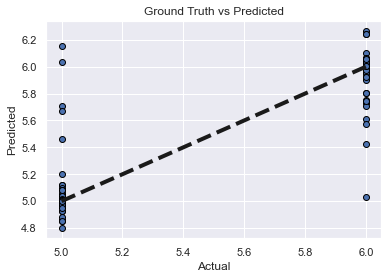

In [90]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds_test, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In the graph, we see that our model doesn't predict the values very well visually, however, our R-squared is satisfactory with a training set of 0.993 and a test set of 0.755.

## Gradient Boosting Parameter Tuning
#### Randomized Search

#### 3 Fold Cross Validation

#### Print and run best parameters for Gradient Boost

In [91]:
from sklearn.metrics.regression import mean_absolute_error as mae
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np

def objective_function_regression(estimator):
    mae_array = cross_val_score( estimator, X_train, y_train, cv= 3, n_jobs=-1, scoring = make_scorer(mae) )
    return np.mean(mae_array)

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
from hyperopt import hp, fmin, tpe
from hyperopt.pyll import scope

# hyperopt object for 
scope.define(GradientBoostingRegressor)

# search space
n_estimators  = hp.randint('n_estimators',1000) 
learning_rate = hp.loguniform('learning_rate',-3,1)
max_depth     = hp.randint('max_depth', 10)
max_features =  hp.randint('max_features',X.shape[1]-1)
min_samples_leaf = hp.randint('min_samples_leaf', 10)
                                       
# model / estimator to be optimized
est0 = (0.1, scope.GradientBoostingRegressor( n_estimators  = n_estimators + 1,
                                            learning_rate = learning_rate,
                                            max_depth = max_depth + 1,
                                            max_features = max_features + 1,
                                            random_state=42) 
        )

# search space
search_space_regression = hp.pchoice('estimator', [est0])

In [93]:
best = fmin(
    fn= objective_function_regression,
    space= search_space_regression,
    algo = tpe.suggest, # This is the optimization algorithm hyperopt uses, a tree of parzen estimators
    max_evals = 10,
    verbose = 2  # The number of iterations
         )

print(best)

100%|██████████| 10/10 [00:06<00:00,  1.46trial/s, best loss: 0.10835594574650594]
{'estimator': 0, 'learning_rate': 0.24422704389906671, 'max_depth': 5, 'max_features': 34, 'n_estimators': 285}


In [94]:
# allocate
Regressor = GradientBoostingRegressor( learning_rate = best['learning_rate'],
                          max_depth = best['max_depth'],
                          max_features = best['max_features'],
                          n_estimators = best['n_estimators'],
                          random_state = 42
                                       )
# fit
Regressor.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.24422704389906671, max_depth=5,
                          max_features=34, n_estimators=285, random_state=42)

The MAE on the test set is : 0.07964291410756437


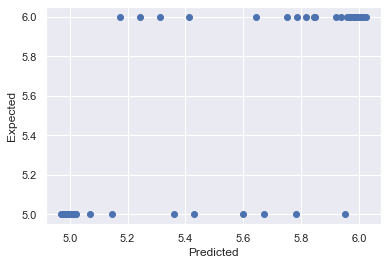

In [95]:
import matplotlib.pyplot as plt

#predict from test set
yhat = Regressor.predict(X_test) ;
print( "{} {}".format('The MAE on the test set is :', mae(y_test, yhat)))

plt.scatter(yhat, y_test); 
plt.ylabel('Expected');plt.xlabel('Predicted')

plt.show()

In the graph, we see that our model doesn't predict the values very well visually, however, our R-squared is satisfactory.

In [96]:
from sklearn.ensemble import GradientBoostingRegressor
#Run Gradient Boost
gbr = GradientBoostingRegressor(n_estimators = 204,
                                min_samples_leaf = 2, max_features = 36,
                                max_depth = 5, random_state=42)
# Fit the Model
gbr.fit(X_train, y_train)
y_preds_train = gbr.predict(X_train)
y_preds_test = gbr.predict(X_test)

print("R-squared of the model in training set is: {}".format(gbr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(gbr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.999998518577592
-----Test set statistics-----
R-squared of the model in test set is: 0.8232848056450935
Mean absolute error of the prediction is: 0.10084565763601513
Mean squared error of the prediction is: 0.04351251322989387
Root mean squared error of the prediction is: 0.20859653216171611
Mean absolute percentage error of the prediction is: 1.8185567027092193


As we can see, the R-squared of the model in the training set is 0.999, whereas it's 0.823 in the test set. Gradient Boost Regressor did a promising job predicting the model. The parameter tuning improved the model, but not by much, which is interesting. 

## K Best Features
Select KBest selects the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.

In [97]:
# Import tools.
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest, chi2, f_regression

# Create and fit selector
selector = SelectKBest(score_func=feature_selection.f_regression)
selector.fit(X, y)

X_skbest = selector.transform(X)
print(X_skbest.shape)

X.columns[selector.get_support(indices=True)].tolist()
#Explaining variance in Data.

(454, 10)


['Avg Sale To List',
 'Price Drops',
 'Price Drops Yoy',
 'parent_metro_region_Atlanta, GA',
 'parent_metro_region_Boston, MA',
 'parent_metro_region_Charlotte, NC',
 'parent_metro_region_Chicago, IL',
 'parent_metro_region_Houston, TX',
 'parent_metro_region_Los Angeles, CA',
 'parent_metro_region_New York, NY']

Using Select K Best didn't improve the Models predictions of Median Ppsf.

## Principal Component Analysis (PCA)

In [98]:
# Scaling data.
sc = StandardScaler()
X = sc.fit_transform(X)

# Set up PCA.
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Resplit training sets.
X_pca_train, X_pca_test, y_train, y_test = train_test_split(
    X_pca, y, random_state=15)

print('Percentage of total variance explained by each component:\n',
      pca.explained_variance_ratio_)

Percentage of total variance explained by each component:
 [0.18192287 0.09585553 0.08791754 0.07709815 0.06288054 0.05593877
 0.04797764 0.04073297 0.03284468 0.02946641]


## Decision Tree with PCA

In [99]:
# Run Decision Tree model with PCA.
from sklearn import tree
dtc_pca = tree.DecisionTreeRegressor()
# Fit the model.
dtc_pca.fit(X_pca_train, y_train)
print(dtc_pca)
y_preds_test = dtc_pca.predict(X_pca_test)


print("R-squared of the model in training set is: {}".format(dtc_pca.score(X_pca_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(dtc_pca.score(X_pca_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

DecisionTreeRegressor()
R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.6778649921507064
Mean absolute error of the prediction is: 0.07894736842105263
Mean squared error of the prediction is: 0.07894736842105263
Root mean squared error of the prediction is: 0.28097574347450816
Mean absolute percentage error of the prediction is: 1.5204678362573099


Decision Tree with PCA did not increase the R-squared model in the training set, whereas the test set of R-squared dropped from .786 to .678. Although the training set stayed the same and the test set dropped, such a high training set often time is overfit especially when Decision Trees are prone to overfitting and they are sensitive to the specific data on which they are trained.

## Random Forest with PCA

In [100]:
# Run Random Forest model with PCA.
rfc_pca = RandomForestRegressor()
# Fit the model.
rfc_pca.fit(X_pca_train, y_train)
print(rfc_pca)
y_preds_test = rfc_pca.predict(X_pca_test)


print("R-squared of the model in training set is: {}".format(rfc_pca.score(X_pca_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(rfc_pca.score(X_pca_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

RandomForestRegressor()
R-squared of the model in training set is: 0.9710740277777777
-----Test set statistics-----
R-squared of the model in test set is: 0.7811844270015698
Mean absolute error of the prediction is: 0.11701754385964909
Mean squared error of the prediction is: 0.053626315789473696
Root mean squared error of the prediction is: 0.23157356453074193
Mean absolute percentage error of the prediction is: 2.2204678362573103


Random Forest with PCA decreased the R-squared model in the test set from 0.853 to 0.784 whereas the training set stayed the same. This Random Forest Regression Model performed worse and it is very interesting data to look into.

## Linear Regression with PCA

In [101]:
# Run Linear Regression model with PCA.
lr_pca = LinearRegression()
# Fit the model.
lr_pca.fit(X_pca_train, y_train)
print(lr_pca)
y_preds_test = lr_pca.predict(X_pca_test)


print("R-squared of the model in training set is: {}".format(lr_pca.score(X_pca_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lr_pca.score(X_pca_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

LinearRegression()
R-squared of the model in training set is: 0.6342257904777312
-----Test set statistics-----
R-squared of the model in test set is: 0.6088123715778597
Mean absolute error of the prediction is: 0.23509038819848802
Mean squared error of the prediction is: 0.09587046756883016
Root mean squared error of the prediction is: 0.3096295650754788
Mean absolute percentage error of the prediction is: 4.376244309681046


Linear Regression with PCA decreased the R-squared model in the training set from 0.889 to 0.634, as well as the decreasing in the test set from 0.810 to 0.609. This Linear Regression Model performed worse and it is very interesting data to look into.

## Gradient Boosting with PCA

In [102]:
from sklearn import ensemble

# Run Gradient Boosting model with PCA.
n = pca.n_components_
gbc_pca = ensemble.GradientBoostingRegressor(n_estimators=n)
gbc_pca.fit(X_pca_train, y_train)

# Fit the model.
y_preds_test = gbc_pca.predict(X_pca_test)


print("R-squared of the model in training set is: {}".format(gbc_pca.score(X_pca_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(gbc_pca.score(X_pca_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.700247571347951
-----Test set statistics-----
R-squared of the model in test set is: 0.5849764457352344
Mean absolute error of the prediction is: 0.2810973894171737
Mean squared error of the prediction is: 0.10171206681542615
Root mean squared error of the prediction is: 0.31892329299602146
Mean absolute percentage error of the prediction is: 5.182244294495102


Gradient Boost with PCA decreased the R-squared model in the training set from 0.990 to 0.700 and also decreased the R-squared model in the test set from 0.823 to 0.566. Gradient Boost Regressor did a promising job predicting the model before PCA, however such a high training set often time is overfit.

## Apply Normalization

In [103]:
#Import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

X = StandardScaler().fit_transform(X)

In [104]:
normalized_X = preprocessing.normalize(X)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, random_state=1)

## Linear Regression with Normalization

In [106]:
# Run Linear Regression
lr = LinearRegression()
# Fit the model
lr = lr.fit(X_train, y_train)
# We are making predictions here
y_preds_train = lr.predict(X_train)
y_preds_test = lr.predict(X_test)

print("R-squared of the model in training set is: {}".format(lr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.8572738464224408
-----Test set statistics-----
R-squared of the model in test set is: 0.8740996150035674
Mean absolute error of the prediction is: 0.11924904985785853
Mean squared error of the prediction is: 0.03132009423618551
Root mean squared error of the prediction is: 0.17697484068699004
Mean absolute percentage error of the prediction is: 2.2053237294526418


Linear Regression with Normalization increased R-Squared in the training set from 0..634 to 0.857 and in the test set from 0.609 to 0.874 when looking at Linear Regression with PCA. These results are very promising.

## Random Forest with Normalization

In [107]:
from sklearn.ensemble import RandomForestRegressor
# Run Random Forest Regressor
rf = RandomForestRegressor(n_estimators= 400,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 10,
 bootstrap= False)
# Fit the model
rf = rf.fit(X_train, y_train)

# We are making predictions here
y_preds_train = rf.predict(X_train)
y_preds_test = rf.predict(X_test)

print("R-squared of the model in training set is: {}".format(rf.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(rf.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.9927224736909335
-----Test set statistics-----
R-squared of the model in test set is: 0.8700890432489047
Mean absolute error of the prediction is: 0.12209795617700521
Mean squared error of the prediction is: 0.03231779956727386
Root mean squared error of the prediction is: 0.17977152045658917
Mean absolute percentage error of the prediction is: 2.231952729259585


Random Forest with Normalization increased R-Squared in the training set from 0.971 to 0.993 and in the test set from 0.784 to 0.871 when looking at Random Forest with PCA. These results are very promising.

# Unsupervised Learning

# Feature Selection
## Principal Component Analysis (PCA)

In [108]:
#create a list of numeric columns
numeric_columns = covid_housing.select_dtypes(['float64', 'int64', 'uint8', 'category']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))
# declare features
new_df = covid_housing[numeric_columns]
# # standardize them
X = new_df


scaler = StandardScaler()
x_stand = scaler.fit_transform(X)

Index(['active_listings', 'active_listings_mom', 'active_listings_yoy',
       'Avg Sale To List', 'Avg Sale To List Mom', 'Avg Sale To List Yoy',
       'Homes Sold Mom', 'Median Dom', 'Median Dom Mom', 'Median Dom Yoy',
       'Median List Ppsf Mom', 'Median List Ppsf Yoy', 'Median Ppsf',
       'Median Ppsf Mom', 'months_of_supply', 'months_of_supply_mom',
       'months_of_supply_yoy', 'New Listings Mom',
       'off_market_in_two_weeks_mom', 'off_market_in_two_weeks_yoy',
       'pending_sales_mom', 'Price Drops', 'Price Drops Mom',
       'Price Drops Yoy', 'Sold Above List Mom', 'total_cases',
       'total_cases_per_million', 'new_cases_per_million',
       'new_deaths_per_million', 'population_density', 'median_age',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'male_smokers'],
      dtype='object')
The number of numerical columns is 34


In [109]:
# Standardizing the features
x_stand = StandardScaler().fit_transform(X)

# PCA to keep 95% of variance
pca = PCA(0.95)

# Components required to keep 95% of variance
x_pca = pca.fit_transform(x_stand)

# Cumulative sum of explained variance by the components
var_cumsum=pca.explained_variance_ratio_.cumsum()
print(var_cumsum)
print('\n')
print('Need to keep {} components to explain 95% of the variance.'.format(len(var_cumsum)))

[0.22452246 0.33554554 0.43634777 0.52944471 0.59229966 0.64742135
 0.69566444 0.73222297 0.7650427  0.79342941 0.81810881 0.84230847
 0.86322954 0.88255876 0.89765945 0.91272185 0.9258794  0.93768962
 0.94814825 0.95702608]


Need to keep 20 components to explain 95% of the variance.


In [110]:
#Define the variables
X = new_df.drop('Median Ppsf', axis=1)
y = new_df['Median Ppsf']
scaler = StandardScaler()
x_stand = scaler.fit_transform(X)
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

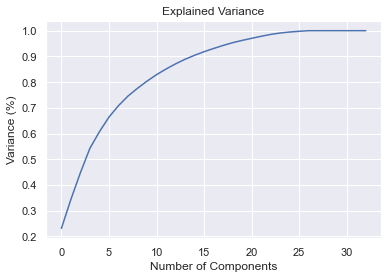

In [111]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(x_stand)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

This is a great visual to what is stated above. 20 components are needed to explain 95% of the variance.

## Find optimal k value via K means
By using the 'elbow graph' method we can identify the best k value to balance the effectiveness between the extremes of one cluster to another for each data point.

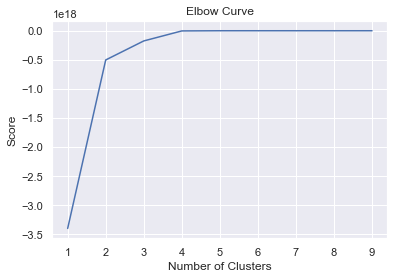

In [112]:
#Elbow Plot for optimal k
clustno = range(1, 10)

kmeans = [KMeans(n_clusters=i) for i in clustno]

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

It appears from the elbow plot that 2 clusters will yield the best results.

In [113]:
for i in range(2,4):
    labels2 = KMeans(n_clusters = i, random_state = 1).fit_predict(x_stand)
    print('Silhouette Score for {}-cluster K-Means: {}'.format(i, metrics.silhouette_score(x_stand, labels2, metric='euclidean')))

Silhouette Score for 2-cluster K-Means: 0.30820697261301555
Silhouette Score for 3-cluster K-Means: 0.22750888735315475


After calculating Silhouette Scores for a range of K values to find an optimal number of clusters, the best solution is 2. The score is .31, which indicates that there is overlap between clusters.

In [114]:
#Spliting the data to compare consistancy across a different numbers of clusters
pca = PCA(n_components=20)
X_pca = pca.fit_transform(x_stand)
y_pred = KMeans(n_clusters=2, random_state=1).fit_predict(X_pca)

X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    x_stand,
    X_pca,
    test_size=0.5,
    random_state=1)

In [115]:
from sklearn.preprocessing import normalize

In [116]:
#assign a variable for data to leave df alone and for readability
ax = new_df.copy()

#normalize, 2 feat PCA for graphs
X_norm = normalize(ax)
X_pca = PCA(20).fit_transform(X_norm)

In [117]:
#create subsets for cross validation
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=1
    )
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=1)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=1)

#make sure it worked
print('should all be True:',
      len(X1) == len(X_pca1),
      len(X2) == len(X_pca2),
      len(X3) == len(X_pca3),
      len(X4) == len(X_pca4))

should all be True: True True True True


## Run Kmeans model and Fit

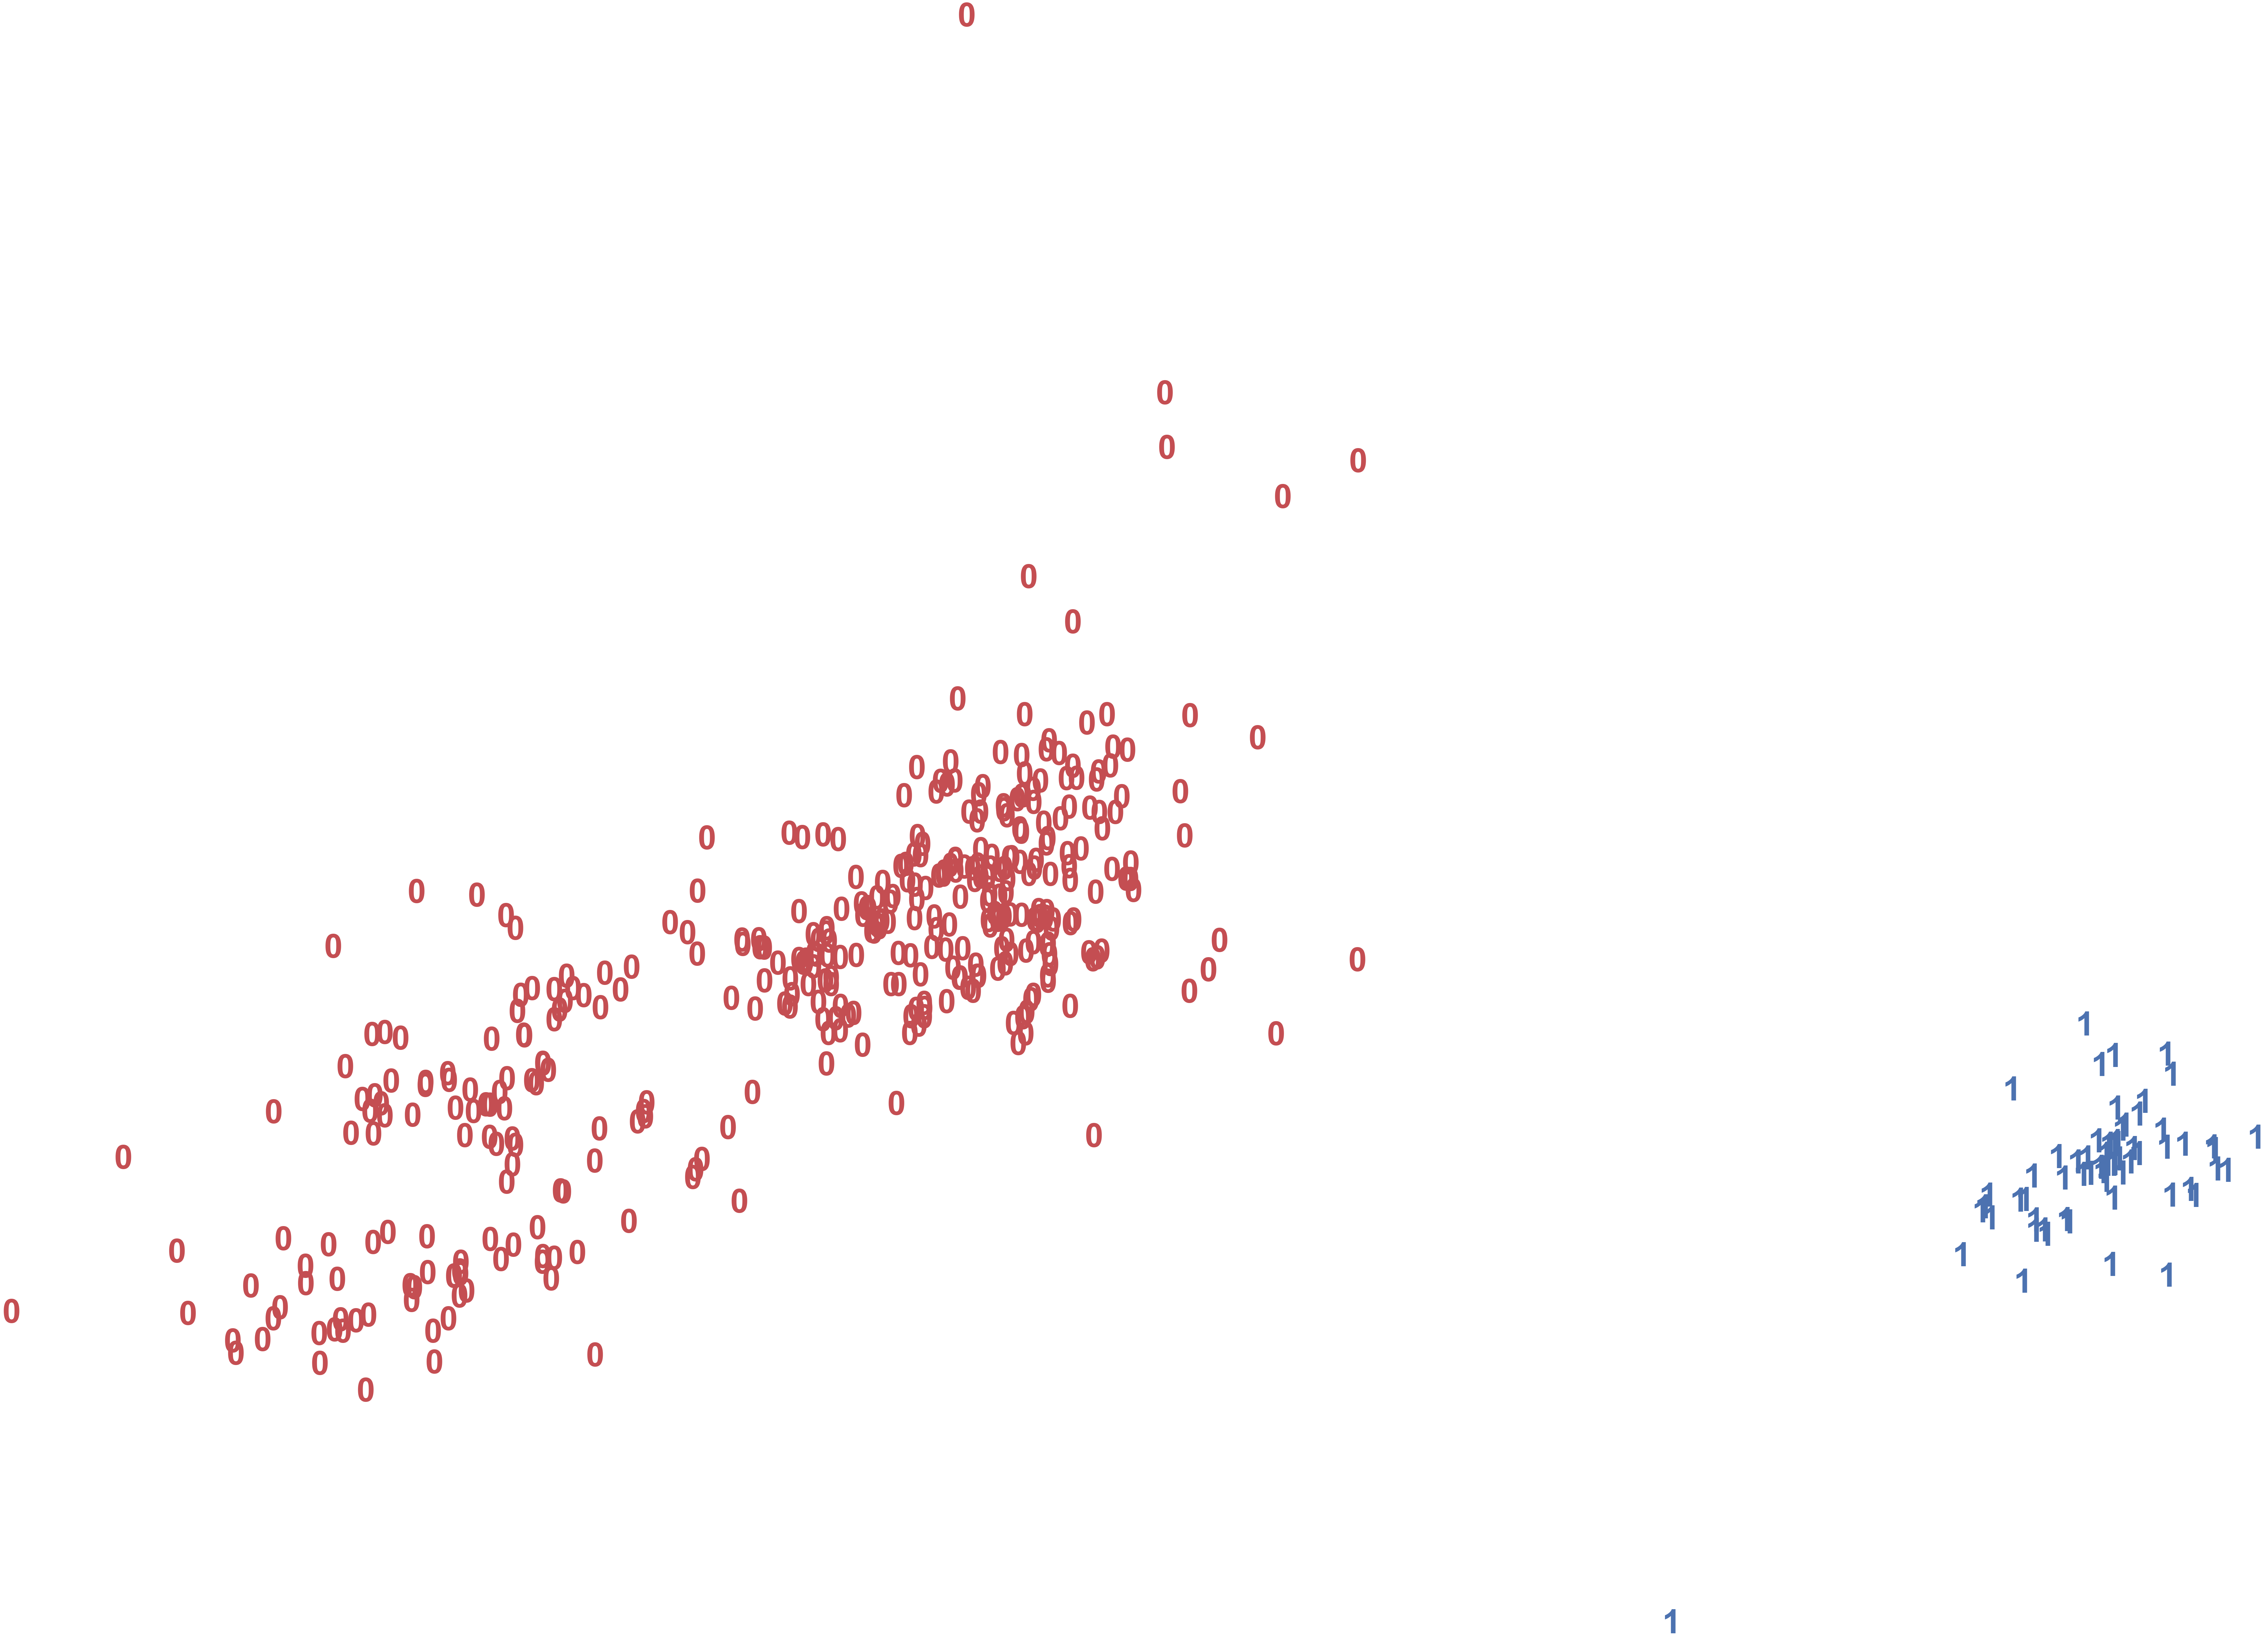

In [118]:
#Define KMeans model and fit
labels = KMeans(n_clusters = 2, random_state = 1).fit_predict(x_stand)

#Plotting the predictions and the actual values
pca = PCA(n_components= 20).fit_transform(x_stand)


plt.figure(figsize = (10,5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(labels[i]),
             color = colors[labels[i]],
             fontdict = {'weight': 'bold', 'size': 100}
            )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [119]:
pd.crosstab(y, labels)

col_0        0  1
Median Ppsf      
102.791123   1  0
107.079384   1  0
107.449857   1  0
107.624208   0  1
107.849961   1  0
...         .. ..
472.673560   1  0
473.323741   1  0
479.674797   1  0
481.162981   1  0
510.533489   1  0

[443 rows x 2 columns]

This is surprising. There is clear separation which when looking at the crosstab above, there isn't a distinguishable difference of why the clusters are acting the way they are. This could be from outliers or a different feature acting on the clusters.

In [130]:
print("Silhouette score of the K-means Clustering solution: {}".format(
    metrics.silhouette_score(x_stand, labels)))

Silhouette score of the K-means Clustering solution: 0.30820697261301555


The Silhouette score is sharing that our clusters of datapoints are closer to other datapoints in the cluster than they are to datapoints in other clusters.

## Run Gaussian Mixture and Fit

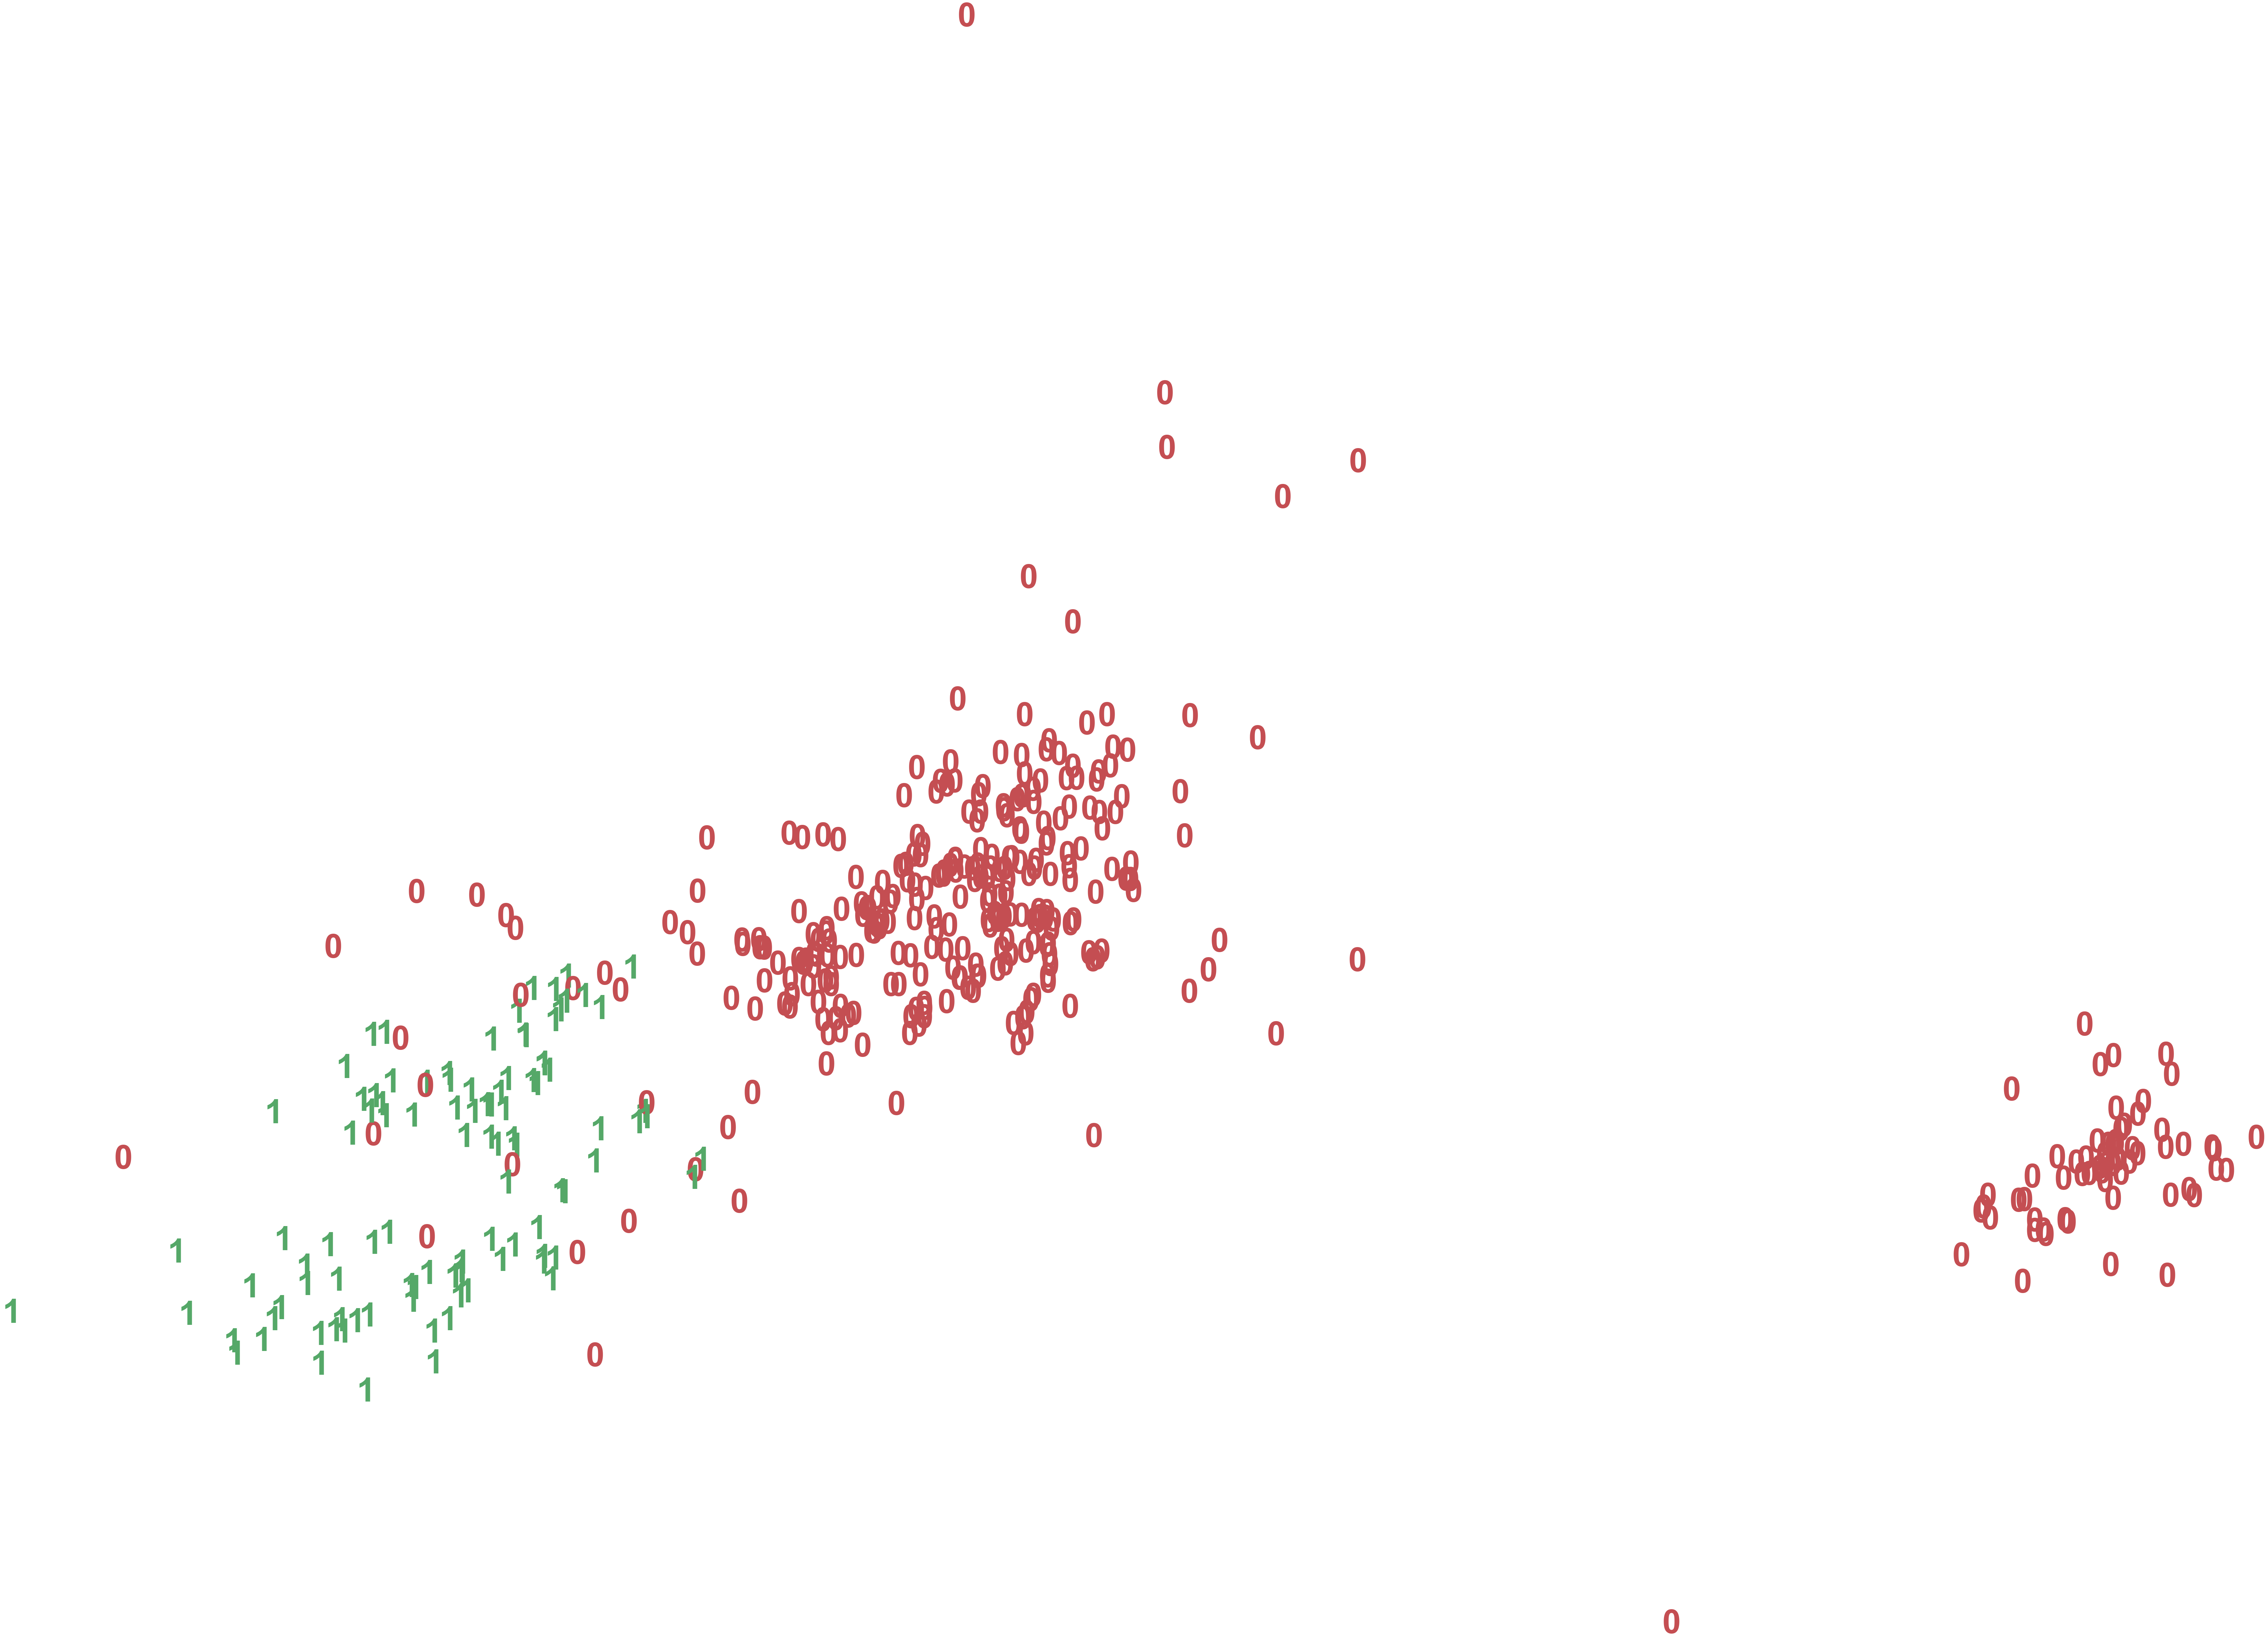

In [121]:
from sklearn.mixture import GaussianMixture

# Fit model and use paramater tuning from two clusters

gmm_cluster = GaussianMixture(n_components=2, covariance_type = 'spherical', random_state=1).fit_predict(x_stand)

pca = PCA(n_components=20).fit_transform(x_stand)

plt.figure(figsize = (10,5))
colors = 'rg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(gmm_cluster[i]),
             color = colors[gmm_cluster[i]],
             fontdict = {'weight': 'bold', 'size': 100}
            )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

This seems that the mixture components are not gaussian distributions because the clusters are not well clustered. There is overlap, unlike the K Means visualization.

In [131]:
print("Silhouette score of the Gaussian Mixture Clustering solution: {}".format(
    metrics.silhouette_score(x_stand, gmm_cluster)))

Silhouette score of the Gaussian Mixture Clustering solution: 0.11195850914672828


The Silhouette score is sharing that our clusters of datapoints are closer to other datapoints in the cluster than they are to datapoints in other clusters, but further away than the k-means clusters.

## Two Cluster Analysis:

The two clusters did not overlap for the most part and it is fairly easy to distinguish each group, even if they weren't sorted by color. The K-means silhouette score performed at a higher score than Gaussian Mixture with a score of 0.308. In terms of silhouette score the best performer is KMeans and it does a decent job matching to its own cluster and poorly matching neighborhood clusters.

# TSNE

TSNE is a non-linear method of dimensionality reduction.

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 454 samples in 0.001s...
[t-SNE] Computed neighbors for 454 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 454 / 454
[t-SNE] Mean sigma: 0.000004
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.637779
[t-SNE] KL divergence after 300 iterations: 0.328387


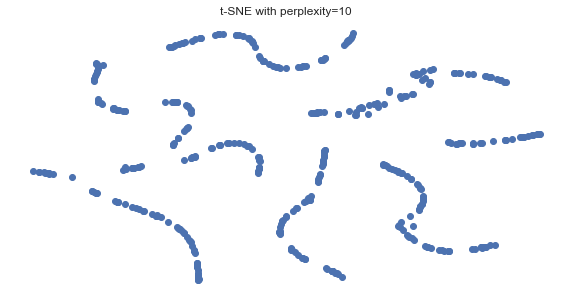

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 454 samples in 0.001s...
[t-SNE] Computed neighbors for 454 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 454 / 454
[t-SNE] Mean sigma: 0.000009
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.680557
[t-SNE] KL divergence after 300 iterations: 0.207516


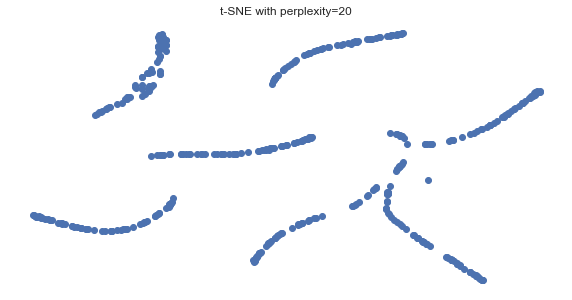

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 454 samples in 0.001s...
[t-SNE] Computed neighbors for 454 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 454 / 454
[t-SNE] Mean sigma: 0.000017
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.172329
[t-SNE] KL divergence after 300 iterations: 0.141022


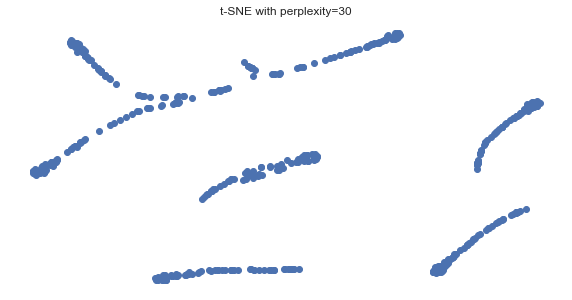

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 454 samples in 0.001s...
[t-SNE] Computed neighbors for 454 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 454 / 454
[t-SNE] Mean sigma: 0.000026
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.112701
[t-SNE] KL divergence after 300 iterations: 0.114627


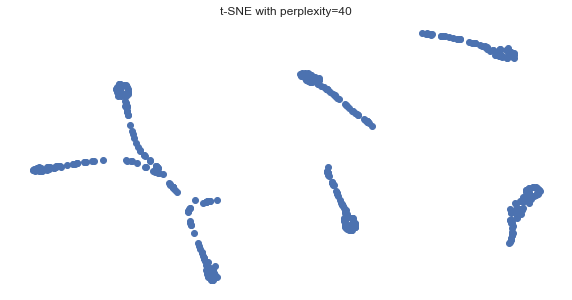

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 454 samples in 0.001s...
[t-SNE] Computed neighbors for 454 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 454 / 454
[t-SNE] Mean sigma: 0.000031
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.929188
[t-SNE] KL divergence after 300 iterations: 0.105596


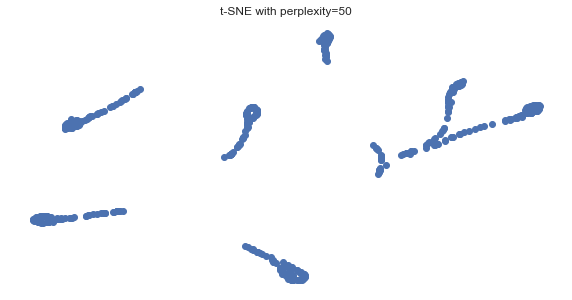

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 454 samples in 0.001s...
[t-SNE] Computed neighbors for 454 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 454 / 454
[t-SNE] Mean sigma: 0.000036
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.546108
[t-SNE] KL divergence after 300 iterations: 0.081793


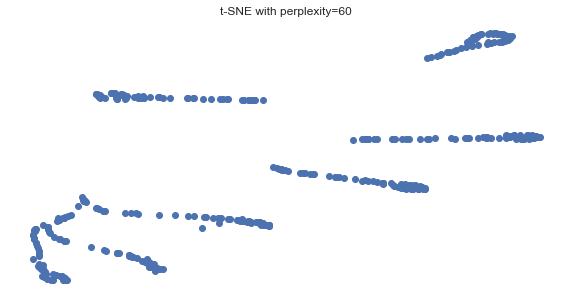

[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 454 samples in 0.001s...
[t-SNE] Computed neighbors for 454 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 454 / 454
[t-SNE] Mean sigma: 0.000041
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.926369
[t-SNE] KL divergence after 300 iterations: 0.066556


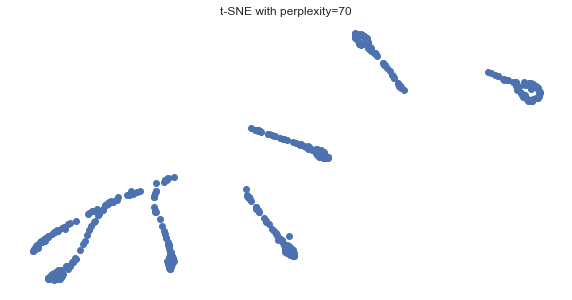

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 454 samples in 0.000s...
[t-SNE] Computed neighbors for 454 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 454 / 454
[t-SNE] Mean sigma: 0.000049
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.975227
[t-SNE] KL divergence after 300 iterations: 0.063824


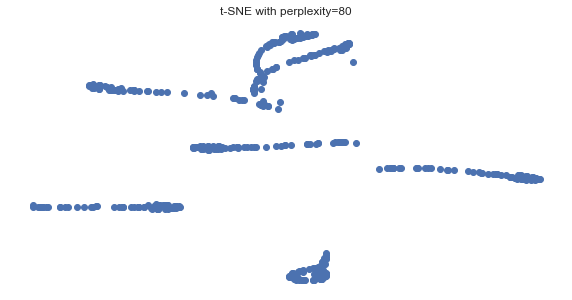

[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 454 samples in 0.000s...
[t-SNE] Computed neighbors for 454 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 454 / 454
[t-SNE] Mean sigma: 0.000058
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.021084
[t-SNE] KL divergence after 300 iterations: 0.056087


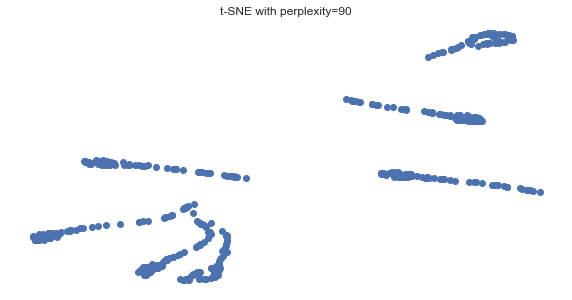

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 454 samples in 0.000s...
[t-SNE] Computed neighbors for 454 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 454 / 454
[t-SNE] Mean sigma: 0.000069
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.190300
[t-SNE] KL divergence after 300 iterations: 0.051810


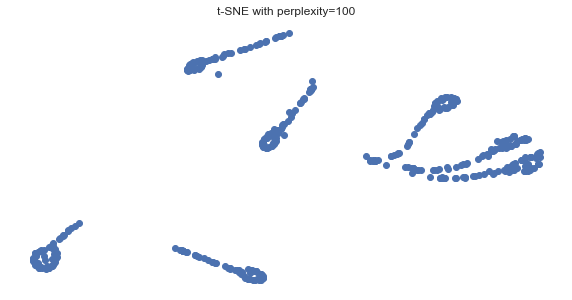

In [123]:
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(10,110,10):
    tsne = TSNE(n_components=2, verbose=1, perplexity=i, n_iter=300)
    tsne_results = tsne.fit_transform(X_norm)
    plt.figure(figsize=(10,5))
    plt.title("t-SNE with perplexity={}".format(i))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

Looks as if t-SNE with perplexity 40 shows the separation the best, although there are clear separations at a few perplexities.

The different configurations of perplexity achieved optimal results. Although unlabeled and uncolored, it's clear to see clustering.

## UMAP
UMAP is a novel manifold learning technique for dimension reduction

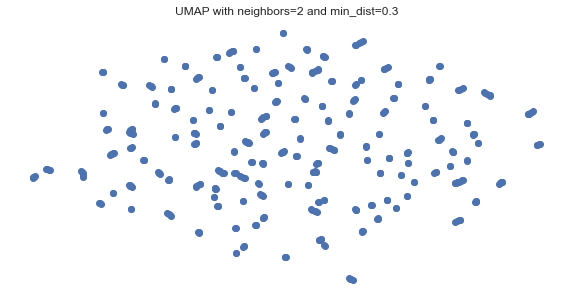

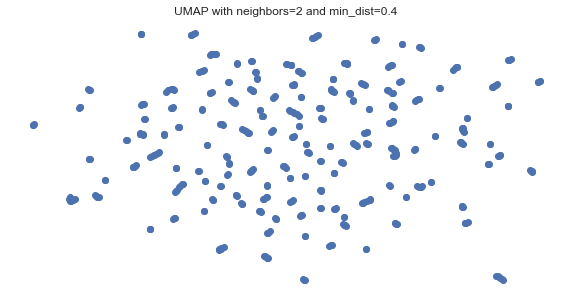

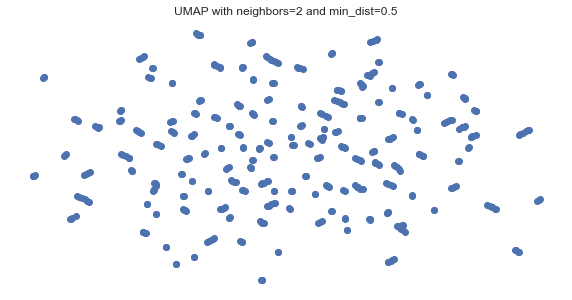

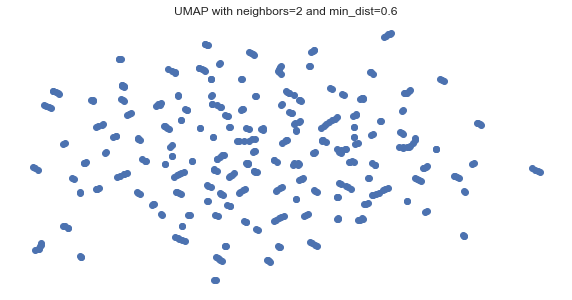

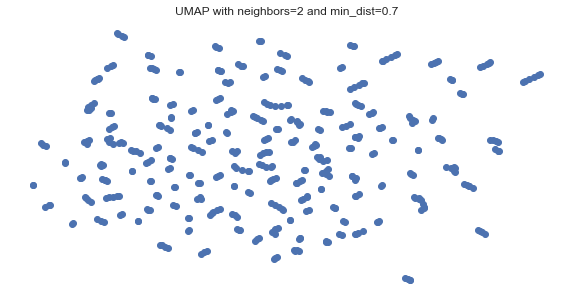

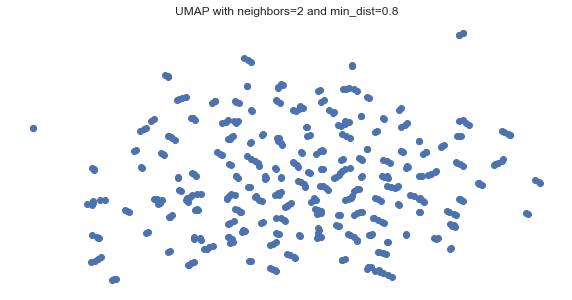

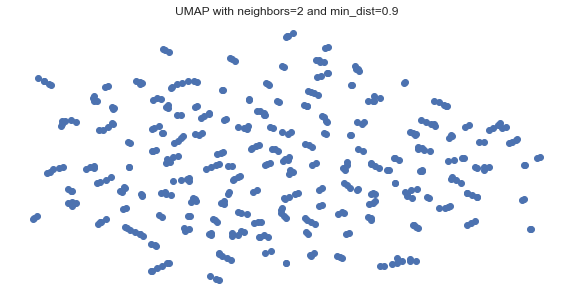

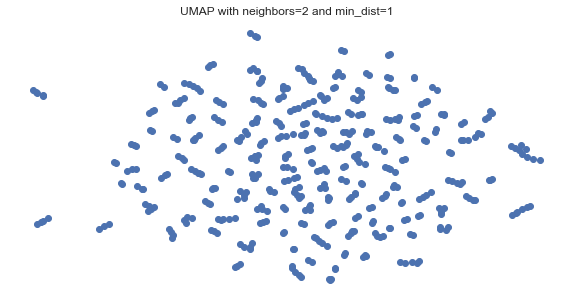

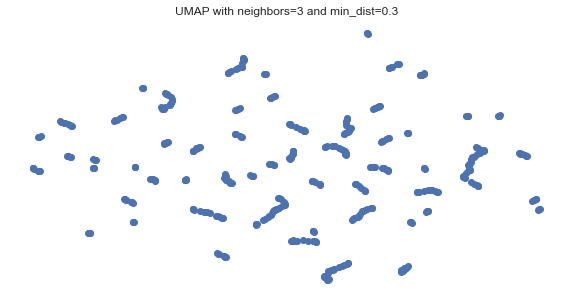

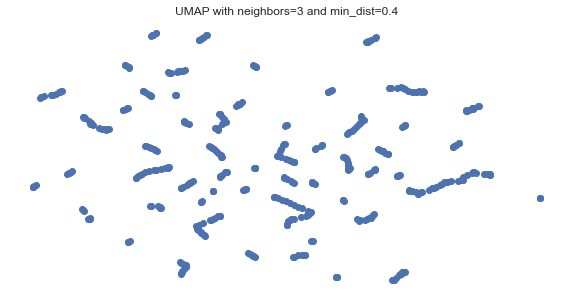

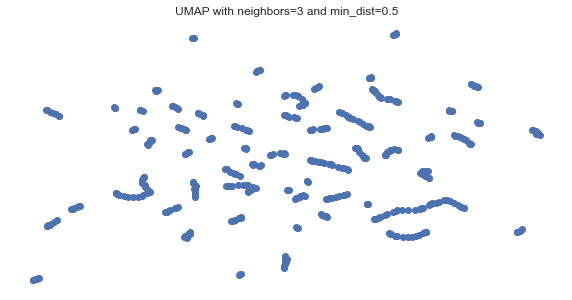

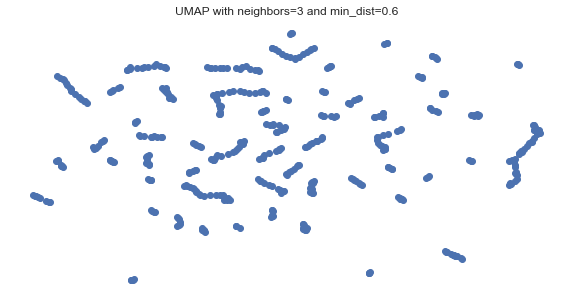

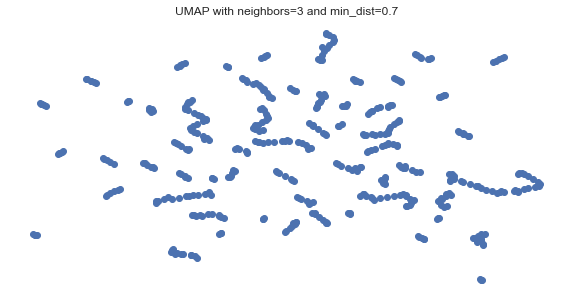

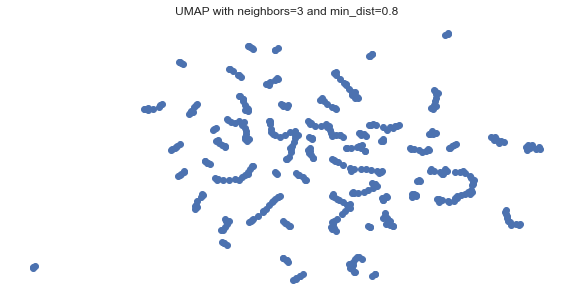

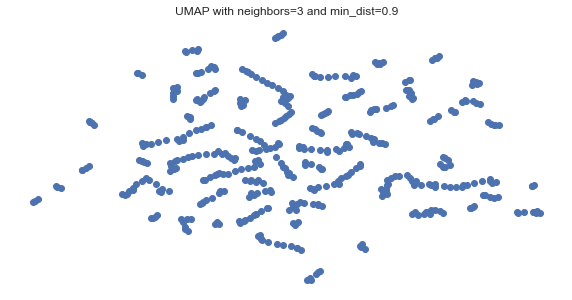

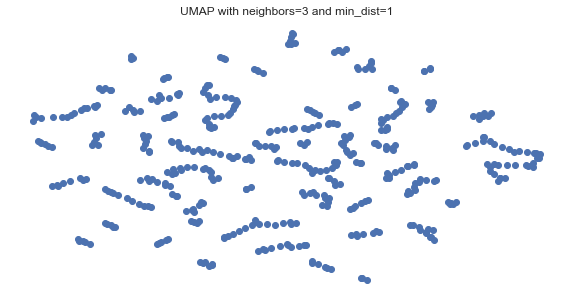

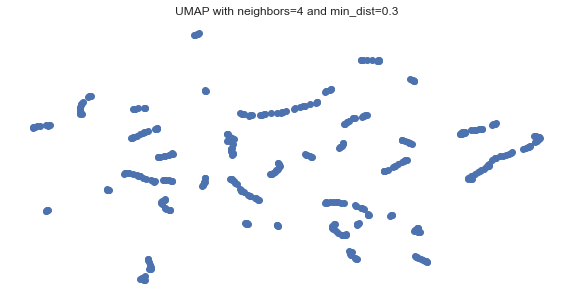

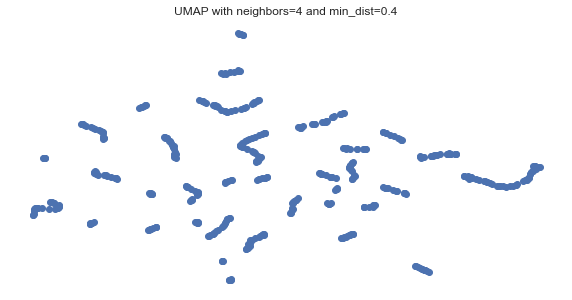

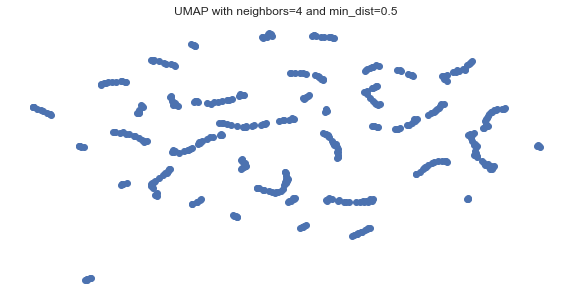

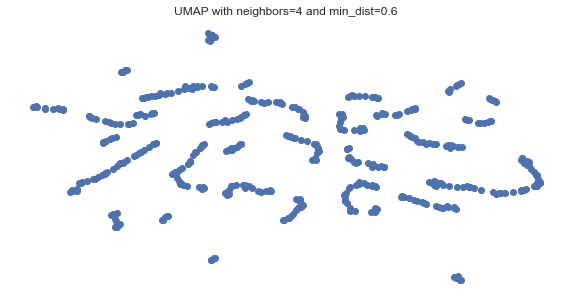

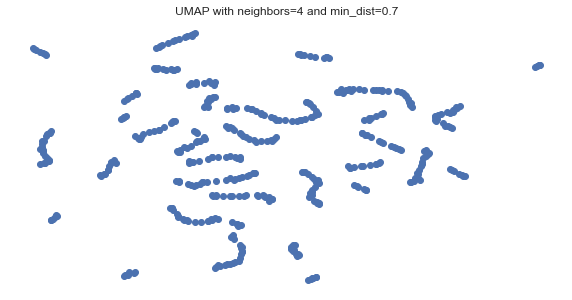

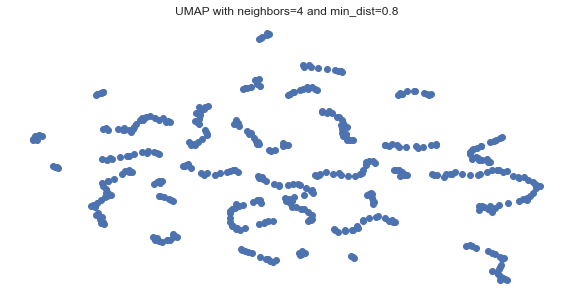

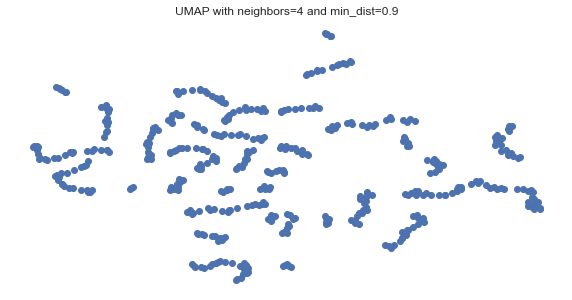

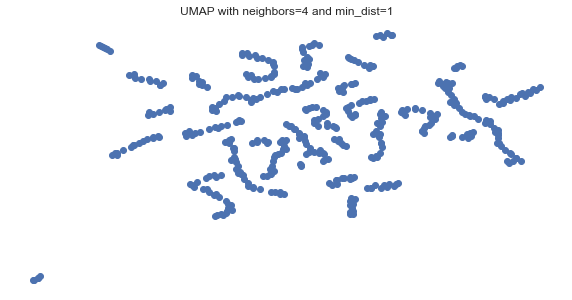

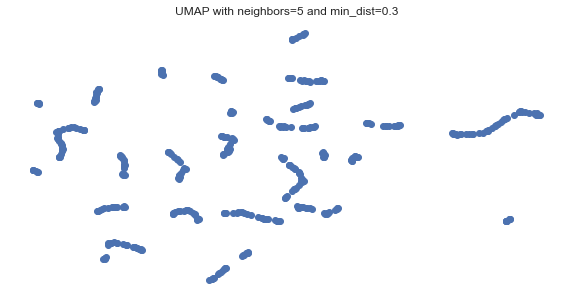

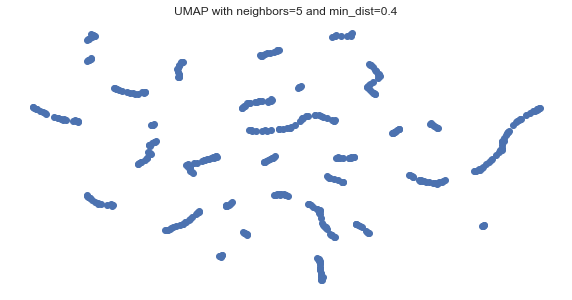

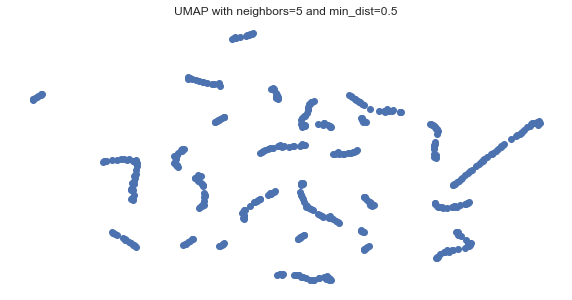

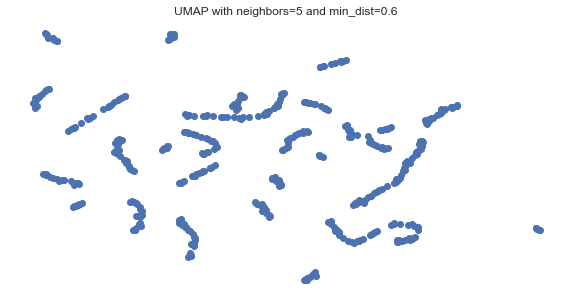

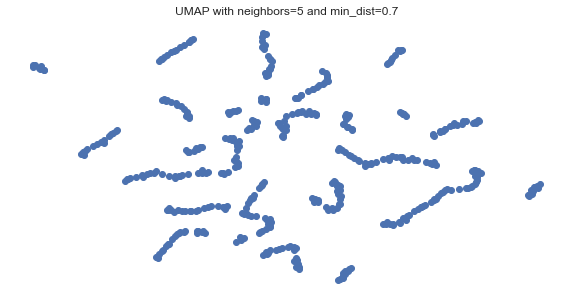

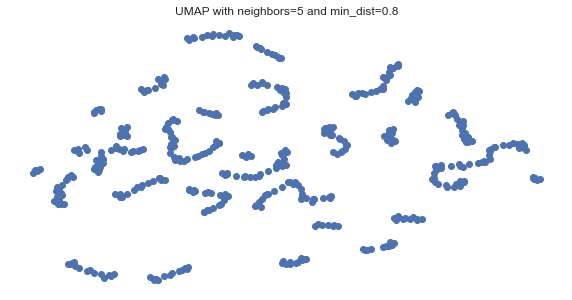

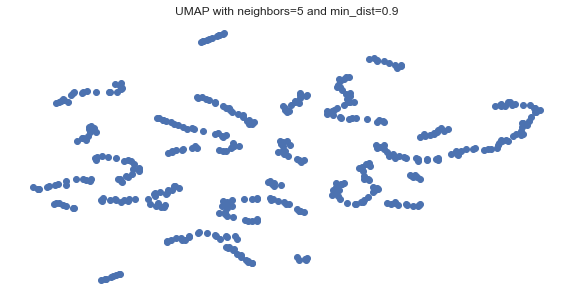

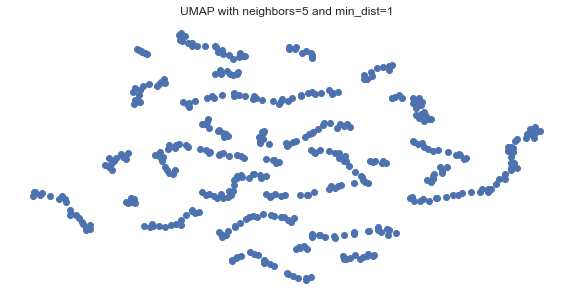

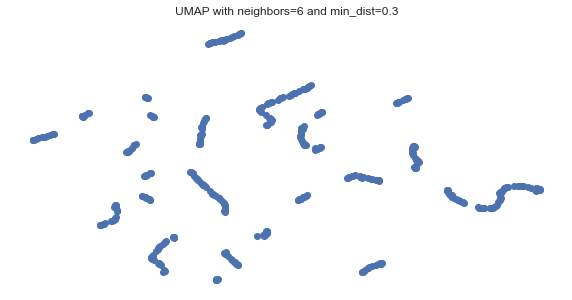

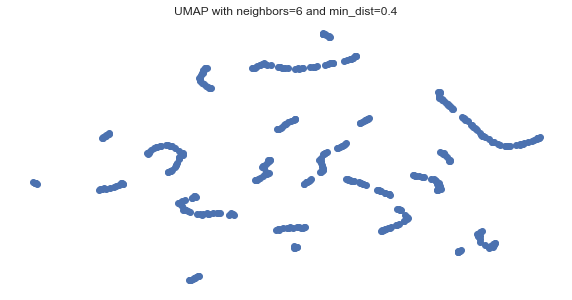

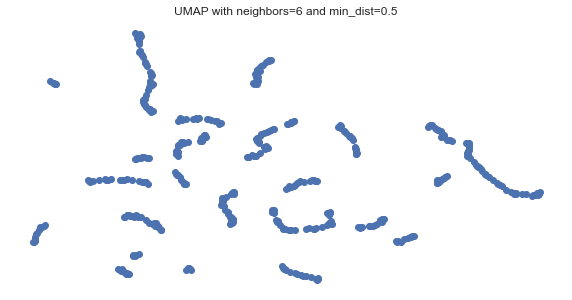

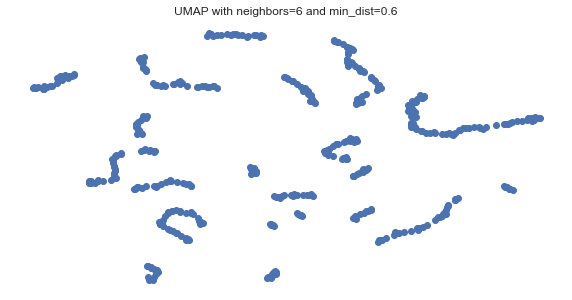

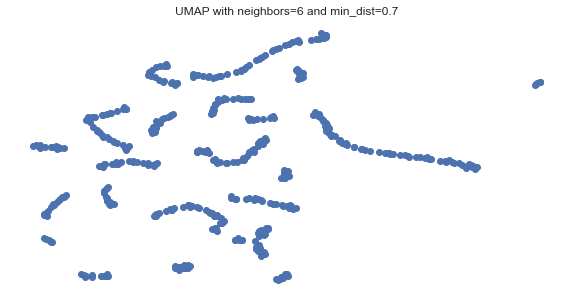

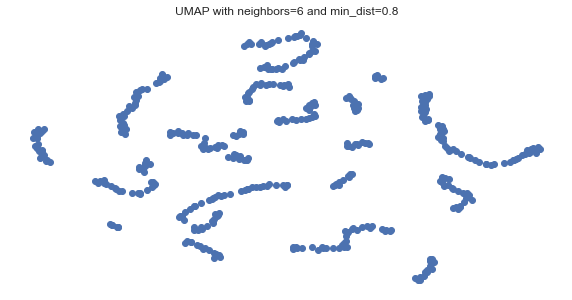

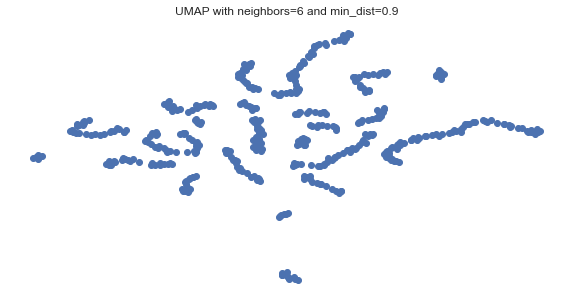

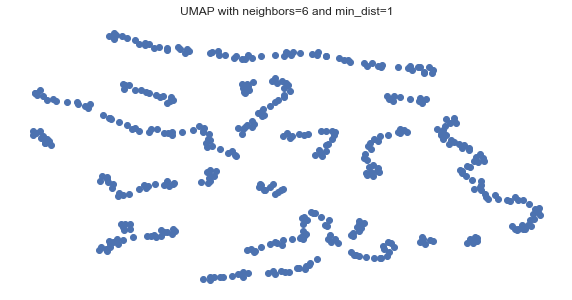

In [124]:
import umap

for i in range(2, 7, 1):
    for j in [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
        umap_results = umap.UMAP(n_neighbors=i,
                                 min_dist=j,
                                 metric='correlation').fit_transform(X)
        plt.figure(figsize=(10, 5))
        plt.scatter(umap_results[:, 0], umap_results[:, 1])
        plt.title("UMAP with neighbors={} and min_dist={}".format(i,j))
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()


UMAP with neighbors 6.0 and min dist 0.9 seems to show clusters the best, although its still not very clear.

UMAP's solution is different to t-SNE. It's difficult to see the different classes because they are not separated very clearly.

## Dendrogram
Performs hierachical clustering on data and represents the resulting tree

In [125]:
from scipy.cluster.hierarchy import dendrogram, linkage

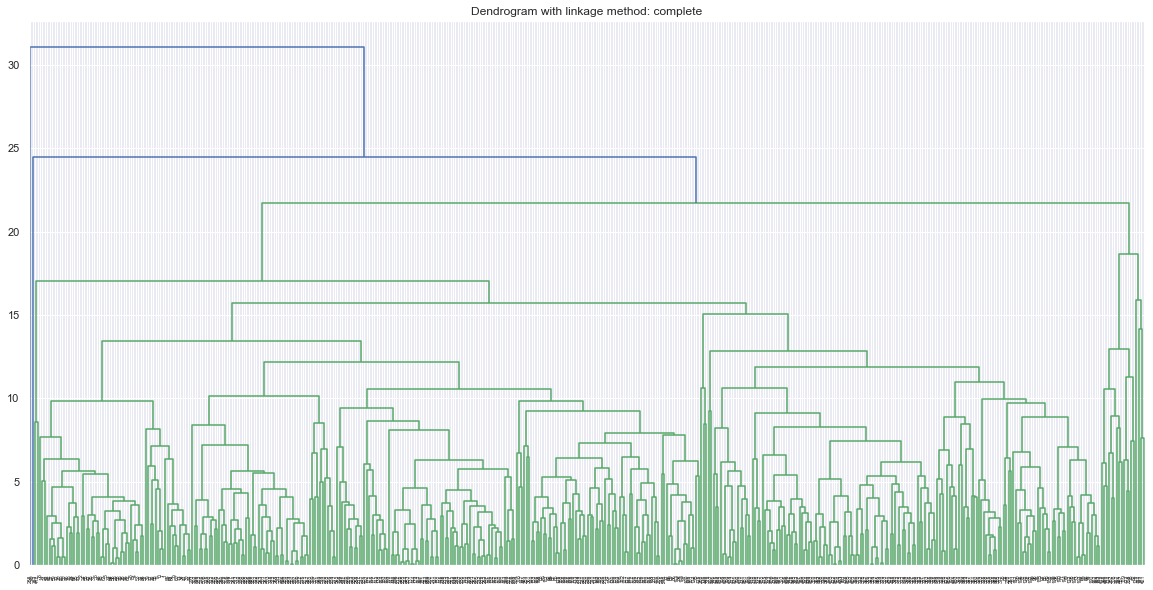

In [126]:
# Complete
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: complete")
dendrogram(linkage(x_stand, method='complete'))
plt.show()

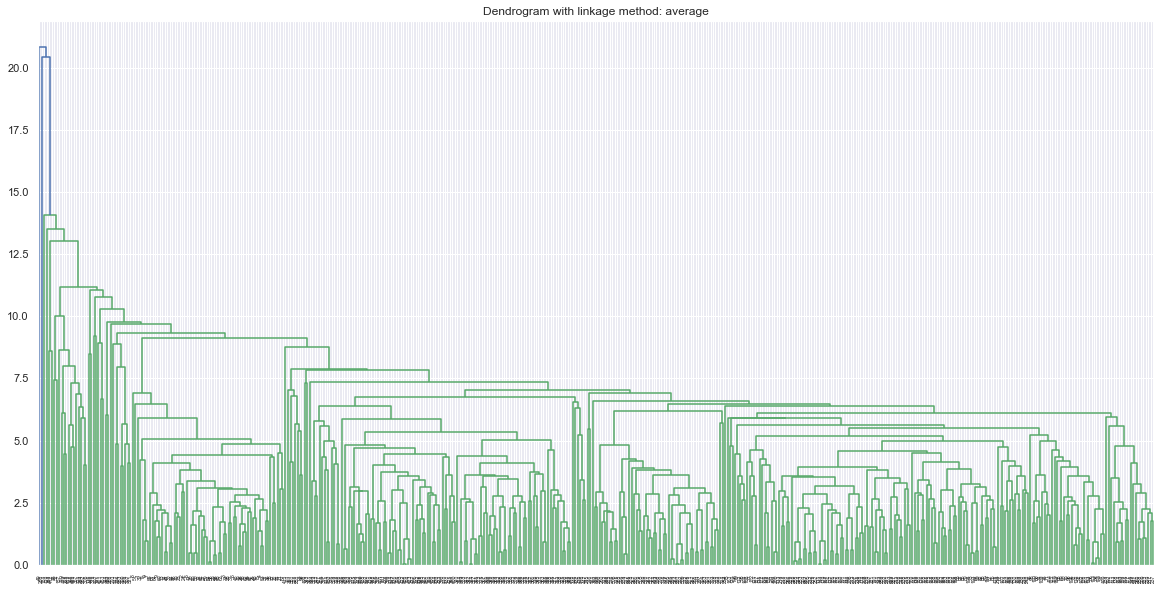

In [127]:
# Average
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(x_stand, method='average'))
plt.show()

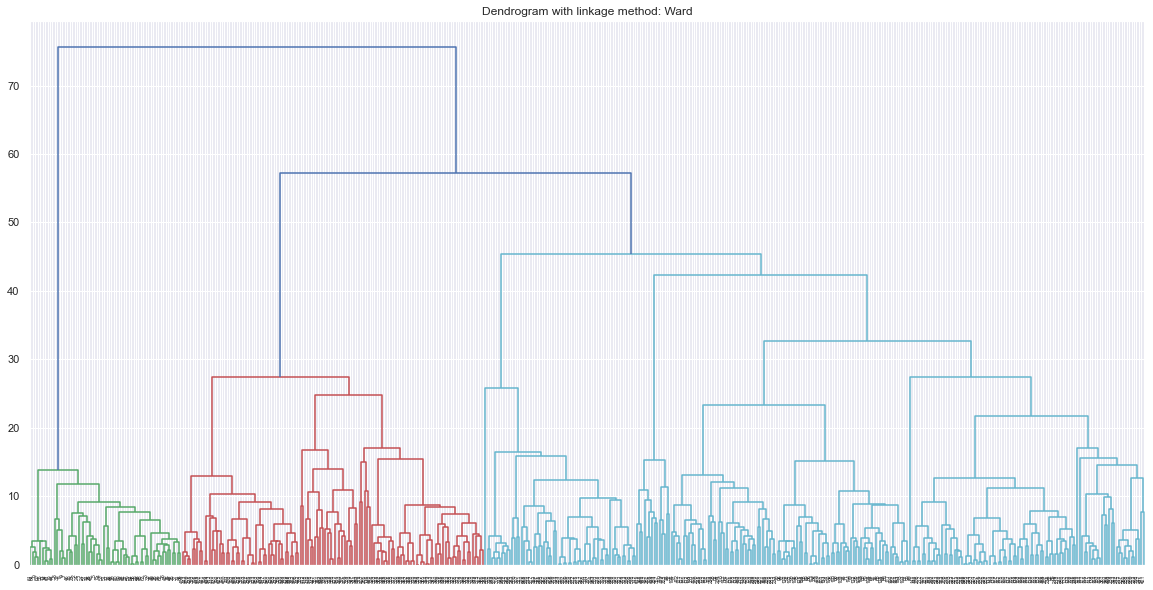

In [128]:
# Ward
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: Ward")
dendrogram(linkage(x_stand, method='ward'))
plt.show()

The more reasonable result is that of the ward method's. The complete and average methods produced results that are hard to distinguish with the facts as their two cluster solutions has too many or few observations for some of the clusters, whereas the ward method is more uniform. Regardless, the dendrogram is quite difficult to read due to the density of the clusters.

### Deep Learning
Tensorflow uses neural network architectures to creat large-scale networks with many layers. Deep learning is based on building very large models that have millions or billions of parameters. Although I don't have a very large model, my supervised learning models performed with satisfactory results and running Tensorflow didn't improve my models, so I took them out of my project. It was slowing down the run time considerably and wasn't expaining my data to the affect my other models were.

# Conclusion 

### Gathering Data 

This project allowed me the opportunity to explore data trends, that are happening at his very moment. One of the challenges that I faced is that I did not have a single dataset with all my features, but rather I had to find separate datasets with the features that I believe would help in my modeling. Combined, there were over 100 features in the dataset and many of them were very similar to each other and I had to choose which ones were must important while building the models. Many of the features I chose were selected on experience and research through my background in Real Estate and what is known about COVID.

Most of the features that I collected, regarding Real Estate, were based on trends. I also searched for features that had a lower correlation with Median Ppsf since the correlation matrix and feature importance show the overall low level of correlation with my dependent outcome. 

### Data Distribution 

When exploring Median Ppsf, it was fairly easy to see that the variable doesn't move much. I believe that part of the explanation for this is that many of the major markets I pulled from Redfin has people moving in and out of the cities due to jobs, relocation, low mortgage rates, change of lifestyle, family etc and has an ebb and flow trend to it. Future research would be to explore a specific area, rather than larger ones to attempt to predict Median Ppsf.

### Clustering and Modeling 

When I used clustering on my dataset, although it clustered well, it wasn't very helpful or informative. I don't believe a regression Median Ppsf was well suited for clustering, however the results were interesting. I believe that the regression models showed more of the strengths of my dataset and models.

The random forest and linear regression models experienced little over-fitting and the R-squared test scores were acceptable. I believe that this was because of my data cleaning and diving deep into the causes of the features correlation.

The random forest and gradient boosted regression models did much better than other models overall. The accuracy on the training set for both are roughly the same 0.99 and 0.99. This shows that these models know the training set well, however I believe it's understanding the set a little too well. I am also satisified about how linear regression formed as well. 

As far as my unsupervised models, the clustering segmented the data well, however, the silhouette scores showed that although they clustered well with their own clusters, it was random at that.

This capstone project has allowed me to look at Supervised, Unsupervised and Deep learning models and how they perform differently.

### Future Application and Research 

Regarding the relationship between Median Ppsf and COVID, the results of a significant relationship were promising, so the alternative hypothesis is accepted. I believe that analyzing the trends and modeling the distribution of Median Ppsf could greatly benefit new homeowners, sellers, investors and lenders alike. Real estate has large financial incentives and possibilities and if you can understand them to benefit your financial or family situation, it would be a great value. For future research, I would gather additional data on Price per square feet (Bedroom, Bathroom, Condition of Home, Sqft of Home, etc.) and possibly add another dataset regarding mortgage rates to further test my hypothesis. Creating explanatory models like this could be used for other challenges to understand Real Estate trends. I also would like to use Deep Learning on a larger dataset with more features regarding Real Estate, because I haven't seen that executed before. To maintain this dataset, it would be rather simple. I would keep downloading the new Datasets released on Redfin and on COVID data from Our World in Data and re-run my project. I hope to continue seeing Data Science and Real Estate joining together to further explain the housing market.